In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
winedat = 'winemag-data-130k-v2.csv'
allwine = pd.read_csv(winedat, low_memory=False)
allwine.head()

Unnamed: 0   country                                        description  \
0           0     Italy  Aromas include tropical fruit, broom, brimston...   
1           1  Portugal  This is ripe and fruity, a wine that is smooth...   
2           2        US  Tart and snappy, the flavors of lime flesh and...   
3           3        US  Pineapple rind, lemon pith and orange blossom ...   
4           4        US  Much like the regular bottling from 2012, this...   

                          designation  points  price           province  \
0                        Vulkà Bianco      87    NaN  Sicily & Sardinia   
1                            Avidagos      87   15.0              Douro   
2                                 NaN      87   14.0             Oregon   
3                Reserve Late Harvest      87   13.0           Michigan   
4  Vintner's Reserve Wild Child Block      87   65.0             Oregon   

              region_1           region_2         taster_name  \
0                 Etna                NaN       Kerin O’Keefe   
1                  NaN                NaN          Roger Voss   
2    Willamette Valley  Willamette Valley        Paul Gregutt   
3  Lake Michigan Shore                NaN  Alexander Peartree   
4    Willamette Valley  Willamette Valley        Paul Gregutt   

  taster_twitter_handle                                              title  \
0          @kerinokeefe                  Nicosia 2013 Vulkà Bianco  (Etna)   
1            @vossroger      Quinta dos Avidagos 2011 Avidagos Red (Douro)   
2           @paulgwine       Rainstorm 2013 Pinot Gris (Willamette Valley)   
3                   NaN  St. Julian 2013 Reserve Late Harvest Riesling ...   
4           @paulgwine   Sweet Cheeks 2012 Vintner's Reserve Wild Child...   

          variety               winery  
0     White Blend              Nicosia  
1  Portuguese Red  Quinta dos Avidagos  
2      Pinot Gris            Rainstorm  
3        Riesling           St. Julian  
4      Pinot Noir         Sweet Cheeks

In [4]:
allwine.columns

Index(['Unnamed: 0', 'country', 'description', 'designation', 'points',
       'price', 'province', 'region_1', 'region_2', 'taster_name',
       'taster_twitter_handle', 'title', 'variety', 'winery'],
      dtype='object')

In [5]:
usewine = allwine.drop(columns=['Unnamed: 0','description','designation','taster_name','taster_twitter_handle'])
usewine.head()

country  points  price           province             region_1  \
0     Italy      87    NaN  Sicily & Sardinia                 Etna   
1  Portugal      87   15.0              Douro                  NaN   
2        US      87   14.0             Oregon    Willamette Valley   
3        US      87   13.0           Michigan  Lake Michigan Shore   
4        US      87   65.0             Oregon    Willamette Valley   

            region_2                                              title  \
0                NaN                  Nicosia 2013 Vulkà Bianco  (Etna)   
1                NaN      Quinta dos Avidagos 2011 Avidagos Red (Douro)   
2  Willamette Valley      Rainstorm 2013 Pinot Gris (Willamette Valley)   
3                NaN  St. Julian 2013 Reserve Late Harvest Riesling ...   
4  Willamette Valley  Sweet Cheeks 2012 Vintner's Reserve Wild Child...   

          variety               winery  
0     White Blend              Nicosia  
1  Portuguese Red  Quinta dos Avidagos  
2      Pinot Gris            Rainstorm  
3        Riesling           St. Julian  
4      Pinot Noir         Sweet Cheeks

In [6]:
len(usewine['variety'].unique())

708

In [7]:
usewine['points'].unique()

array([ 87,  86,  85,  88,  92,  91,  90,  89,  83,  82,  81,  80, 100,
        98,  97,  96,  95,  93,  94,  84,  99], dtype=int64)

In [8]:
usewine['country'].unique()

array(['Italy', 'Portugal', 'US', 'Spain', 'France', 'Germany',
       'Argentina', 'Chile', 'Australia', 'Austria', 'South Africa',
       'New Zealand', 'Israel', 'Hungary', 'Greece', 'Romania', 'Mexico',
       'Canada', nan, 'Turkey', 'Czech Republic', 'Slovenia',
       'Luxembourg', 'Croatia', 'Georgia', 'Uruguay', 'England',
       'Lebanon', 'Serbia', 'Brazil', 'Moldova', 'Morocco', 'Peru',
       'India', 'Bulgaria', 'Cyprus', 'Armenia', 'Switzerland',
       'Bosnia and Herzegovina', 'Ukraine', 'Slovakia', 'Macedonia',
       'China', 'Egypt'], dtype=object)

In [9]:
winecounts = usewine['variety'].value_counts()

In [10]:
winecounts[0:12]

Pinot Noir                  13272
Chardonnay                  11753
Cabernet Sauvignon           9472
Red Blend                    8946
Bordeaux-style Red Blend     6915
Riesling                     5189
Sauvignon Blanc              4967
Syrah                        4142
Rosé                         3564
Merlot                       3102
Nebbiolo                     2804
Zinfandel                    2714
Name: variety, dtype: int64

In [11]:
eightvars = ['Pinot Noir','Chardonnay','Cabernet Sauvignon','Riesling','Sauvignon Blanc','Syrah','Rosé','Merlot']

In [12]:
mostdata_wines = usewine[usewine['variety'].isin(eightvars)]
mostdata_wines.head()

country  points  price    province             region_1           region_2  \
3       US      87   13.0    Michigan  Lake Michigan Shore                NaN   
4       US      87   65.0      Oregon    Willamette Valley  Willamette Valley   
10      US      87   19.0  California          Napa Valley               Napa   
12      US      87   34.0  California     Alexander Valley             Sonoma   
14      US      87   12.0  California        Central Coast      Central Coast   

                                                title             variety  \
3   St. Julian 2013 Reserve Late Harvest Riesling ...            Riesling   
4   Sweet Cheeks 2012 Vintner's Reserve Wild Child...          Pinot Noir   
10  Kirkland Signature 2011 Mountain Cuvée Caberne...  Cabernet Sauvignon   
12  Louis M. Martini 2012 Cabernet Sauvignon (Alex...  Cabernet Sauvignon   
14           Mirassou 2012 Chardonnay (Central Coast)          Chardonnay   

                winery  
3           St. Julian  
4         Sweet Cheeks  
10  Kirkland Signature  
12    Louis M. Martini  
14            Mirassou

In [13]:
len(mostdata_wines)

55461

In [14]:
reg1_count = len(mostdata_wines['country'].dropna())
reg1_count

55446

In [15]:
mostdata_wines.columns

Index(['country', 'points', 'price', 'province', 'region_1', 'region_2',
       'title', 'variety', 'winery'],
      dtype='object')

In [16]:
wine_review_df = mostdata_wines.drop(columns=['price','province','region_1','region_2','title'])
wine_review_df.head()

country  points             variety              winery
3       US      87            Riesling          St. Julian
4       US      87          Pinot Noir        Sweet Cheeks
10      US      87  Cabernet Sauvignon  Kirkland Signature
12      US      87  Cabernet Sauvignon    Louis M. Martini
14      US      87          Chardonnay            Mirassou

In [31]:
country_count = wine_review_df.groupby("country").count().reset_index()
country_count = country_count.drop(columns=['variety', 'winery']).rename(columns={'points': 'count'})
country_count

country  count
0        Argentina   1174
1          Armenia      1
2        Australia   1066
3          Austria    942
4           Brazil     18
5         Bulgaria     86
6           Canada    148
7            Chile   2932
8          Croatia      4
9   Czech Republic      3
10         England     25
11          France   8684
12         Georgia      1
13         Germany   1862
14          Greece     52
15         Hungary      9
16           India      2
17          Israel    244
18           Italy    914
19         Lebanon      6
20      Luxembourg      2
21       Macedonia      4
22          Mexico     28
23         Moldova     17
24         Morocco     12
25     New Zealand   1284
26            Peru      3
27        Portugal    379
28         Romania     73
29          Serbia      3
30        Slovakia      1
31        Slovenia     30
32    South Africa    647
33           Spain    372
34     Switzerland      4
35          Turkey     14
36              US  34379
37         Ukraine      6
38         Uruguay     15

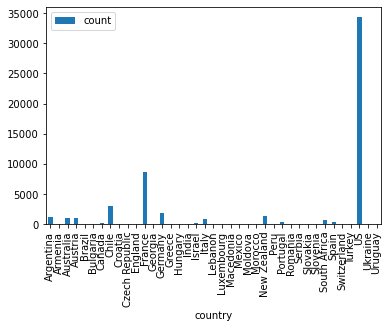

In [32]:
country_count.plot(kind="bar", x="country", y="count");

In [35]:
variety_count = wine_review_df.groupby("variety").count().reset_index()
variety_count = variety_count.drop(columns=['country', 'winery']).rename(columns={'points': 'count'})
variety_count

variety  count
0  Cabernet Sauvignon   9472
1          Chardonnay  11753
2              Merlot   3102
3          Pinot Noir  13272
4            Riesling   5189
5                Rosé   3564
6     Sauvignon Blanc   4967
7               Syrah   4142

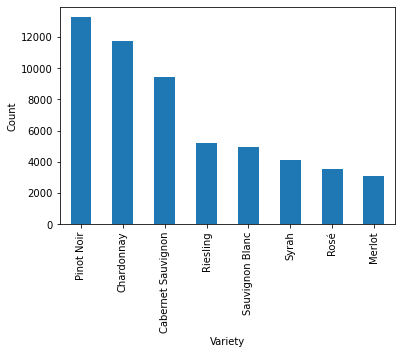

In [43]:
variety_count.sort_values('count', ascending=False)[['variety','count']].plot(kind="bar", x="variety", xlabel="Variety", ylabel="Count", legend=False);

In [22]:
#make searchterm column
wine_review_df['winery_search'] = wine_review_df['winery'] + " winery" + " " + wine_review_df['country']
wine_review_df.head()

country  points             variety              winery  \
3       US      87            Riesling          St. Julian   
4       US      87          Pinot Noir        Sweet Cheeks   
10      US      87  Cabernet Sauvignon  Kirkland Signature   
12      US      87  Cabernet Sauvignon    Louis M. Martini   
14      US      87          Chardonnay            Mirassou   

                   winery_search  
3           St. Julian winery US  
4         Sweet Cheeks winery US  
10  Kirkland Signature winery US  
12    Louis M. Martini winery US  
14            Mirassou winery US

In [23]:
len(wine_review_df)

55461

In [37]:
# save cleaned file to csv 
wine_review_df.to_csv('wine_reviews_cleaned.csv')

In [24]:
#create list of winery names to search with google maps function
winery_list = wine_review_df.winery_search.unique()
len(winery_list)

8701

In [25]:
US_winery_list = wine_review_df[wine_review_df['country'] == 'US']
US_winery_list.head()

country  points             variety              winery  \
3       US      87            Riesling          St. Julian   
4       US      87          Pinot Noir        Sweet Cheeks   
10      US      87  Cabernet Sauvignon  Kirkland Signature   
12      US      87  Cabernet Sauvignon    Louis M. Martini   
14      US      87          Chardonnay            Mirassou   

                   winery_search  
3           St. Julian winery US  
4         Sweet Cheeks winery US  
10  Kirkland Signature winery US  
12    Louis M. Martini winery US  
14            Mirassou winery US

In [26]:
len(US_winery_list)

34379

In [28]:
# Dependencies
import json
import requests
import logging
import time

logger = logging.getLogger("root")
logger.setLevel(logging.DEBUG)
# create console handler
ch = logging.StreamHandler()
ch.setLevel(logging.DEBUG)
logger.addHandler(ch)

# Google developer API key
from config import g_key

In [29]:
return_full_results = False

def get_googlemaps_results(winery, api_key=None, return_full_response=False):
    
    params = {"key": api_key, "input": winery, "inputtype": "textquery", "fields": "geometry"}

    # Set Geocoding url
    base_url = "https://maps.googleapis.com/maps/api/place/findplacefromtext/json"
        
    # Ping google for the results:
    response = requests.get(base_url, params=params)
    results = response.json()
    
    # if there are no results or an error, return empty results.

    if len(results['candidates']) == 0:
        output = {
            "latitude": None,
            "longitude": None,
        }
    else:    
        answer = results['candidates'][0]
        output = {
            "winery_search_term": winery,
            "latitude": answer.get('geometry').get('location').get('lat'),
            "longitude": answer.get('geometry').get('location').get('lng'),
        }
        
    # Append other details:    
    output['number_of_results'] = len(results['candidates'])
    output['status'] = results.get('status')
    if return_full_response is True:
        output['response'] = results
    
    return output

In [30]:
test_result = get_googlemaps_results("St. Julian winery US", g_key, return_full_results)
test_result

{'winery_search_term': 'St. Julian winery US',
 'latitude': 42.2122513,
 'longitude': -85.8917127,
 'number_of_results': 1,
 'status': 'OK'}

In [31]:
test_winery_list = winery_list[0:10]
test_winery_list

array(['St. Julian winery US', 'Sweet Cheeks winery US',
       'Kirkland Signature winery US', 'Louis M. Martini winery US',
       'Mirassou winery US', 'Richard Böcking winery Germany',
       'Acrobat winery US', 'Bianchi winery US',
       'Castello di Amorosa winery US', 'Envolve winery US'], dtype=object)

In [36]:
#create empty list that we will populate with for loop
winery_latlongs = []

#set output file name
output_filename = 'winery_latlong_data.csv'

# Go through each address in turn
for winery in winery_list:
    # While the address geocoding is not finished:
    geocoded = False
    while geocoded is not True:
        # Geocode the address with google
        try:
            geocode_result = get_googlemaps_results(winery, g_key, return_full_response=return_full_results)
        except Exception as e:
            logger.exception(e)
            logger.error("Major error with {}".format(winery))
            logger.error("Skipping!")
            geocoded = True
            
        # If we're over the API limit, backoff for a while and try again later.
        if geocode_result['status'] == 'OVER_QUERY_LIMIT':
            logger.info("Hit Query Limit! Backing off for a bit.")
            time.sleep(BACKOFF_TIME * 60) # sleep for 30 minutes
            geocoded = False
        else:
            # If we're ok with API use, save the results
            # Note that the results might be empty / non-ok - log this
            if geocode_result['status'] != 'OK':
                logger.warning("Error geocoding {}: {}".format(winery, geocode_result['status']))
            logger.debug("Geocoded: {}: {}".format(winery, geocode_result['status']))
            winery_latlongs.append(geocode_result)           
            geocoded = True

    # Print status every 100 addresses
    if len(winery_latlongs) % 100 == 0:
    	print("Completed {} of {} address".format(len(winery_latlongs), len(winery_list)))
            
    # Every 500 addresses, save progress to file(in case of a failure so we have something!)
    if len(winery_latlongs) % 500 == 0:
        pd.DataFrame(winery_latlongs).to_csv("{}_bak".format(output_filename))

# All done
print("Finished geocoding all wineries")

# save fulls results to CSV
pd.DataFrame(winery_latlongs).to_csv(output_filename)

Geocoded: St. Julian winery US: OK
Geocoded: St. Julian winery US: OK
Geocoded: Sweet Cheeks winery US: OK
Geocoded: Sweet Cheeks winery US: OK
Geocoded: Kirkland Signature winery US: OK
Geocoded: Kirkland Signature winery US: OK
Geocoded: Louis M. Martini winery US: OK
Geocoded: Louis M. Martini winery US: OK
Error geocoding Mirassou winery US: ZERO_RESULTS
Error geocoding Mirassou winery US: ZERO_RESULTS
Geocoded: Mirassou winery US: ZERO_RESULTS
Geocoded: Mirassou winery US: ZERO_RESULTS
Geocoded: Richard Böcking winery Germany: OK
Geocoded: Richard Böcking winery Germany: OK
Error geocoding Acrobat winery US: ZERO_RESULTS
Error geocoding Acrobat winery US: ZERO_RESULTS
Geocoded: Acrobat winery US: ZERO_RESULTS
Geocoded: Acrobat winery US: ZERO_RESULTS
Geocoded: Bianchi winery US: OK
Geocoded: Bianchi winery US: OK
Geocoded: Castello di Amorosa winery US: OK
Geocoded: Castello di Amorosa winery US: OK
Geocoded: Envolve winery US: OK
Geocoded: Envolve winery US: OK
Geocoded: Erath wi

Completed 100 of 8701 address


Geocoded: Cambria winery US: OK
Geocoded: Cambria winery US: OK
Geocoded: J. Christopher winery US: OK
Geocoded: J. Christopher winery US: OK
Geocoded: Salomon-Undhof winery Austria: OK
Geocoded: Salomon-Undhof winery Austria: OK
Geocoded: Talley winery US: OK
Geocoded: Talley winery US: OK
Geocoded: Parallel winery US: OK
Geocoded: Parallel winery US: OK
Geocoded: Ventisquero winery Chile: OK
Geocoded: Ventisquero winery Chile: OK
Geocoded: Aquinas winery US: OK
Geocoded: Aquinas winery US: OK
Error geocoding Arboleda winery Chile: ZERO_RESULTS
Error geocoding Arboleda winery Chile: ZERO_RESULTS
Geocoded: Arboleda winery Chile: ZERO_RESULTS
Geocoded: Arboleda winery Chile: ZERO_RESULTS
Geocoded: Buried Cane winery US: OK
Geocoded: Buried Cane winery US: OK
Geocoded: Cramele Recas winery Romania: OK
Geocoded: Cramele Recas winery Romania: OK
Geocoded: Domaine Bertagna winery France: OK
Geocoded: Domaine Bertagna winery France: OK
Geocoded: Otto's Constant Dream winery New Zealand: OK
G

Geocoded: Limerick Lane winery US: OK


Completed 200 of 8701 address


Geocoded: Loring Wine Company winery US: OK
Geocoded: Loring Wine Company winery US: OK
Geocoded: Four Lanterns winery US: OK
Geocoded: Four Lanterns winery US: OK
Geocoded: World's End winery US: OK
Geocoded: World's End winery US: OK
Geocoded: W.H. Smith winery US: OK
Geocoded: W.H. Smith winery US: OK
Geocoded: Alleromb winery US: OK
Geocoded: Alleromb winery US: OK
Error geocoding Ardor winery US: ZERO_RESULTS
Error geocoding Ardor winery US: ZERO_RESULTS
Geocoded: Ardor winery US: ZERO_RESULTS
Geocoded: Ardor winery US: ZERO_RESULTS
Geocoded: Château de Campuget winery France: OK
Geocoded: Château de Campuget winery France: OK
Geocoded: Chateau Lafayette Reneau winery US: OK
Geocoded: Chateau Lafayette Reneau winery US: OK
Geocoded: Cupcake winery US: OK
Geocoded: Cupcake winery US: OK
Geocoded: Seven Falls winery US: OK
Geocoded: Seven Falls winery US: OK
Geocoded: Silvertip winery US: OK
Geocoded: Silvertip winery US: OK
Geocoded: Stevens winery US: OK
Geocoded: Stevens winery U

Geocoded: Patton Valley winery US: OK
Geocoded: Patton Valley winery US: OK
Geocoded: Pierre Gimonnet et Fils winery France: OK
Geocoded: Pierre Gimonnet et Fils winery France: OK
Geocoded: Adelsheim winery US: OK
Geocoded: Adelsheim winery US: OK


Completed 300 of 8701 address


Geocoded: Ferrari winery Italy: OK
Geocoded: Ferrari winery Italy: OK
Geocoded: St. Supéry winery US: OK
Geocoded: St. Supéry winery US: OK
Geocoded: Viña Cobos winery Argentina: OK
Geocoded: Viña Cobos winery Argentina: OK
Geocoded: Von Schleinitz winery Germany: OK
Geocoded: Von Schleinitz winery Germany: OK
Geocoded: Barnard Griffin winery US: OK
Geocoded: Barnard Griffin winery US: OK
Geocoded: Beacon Hill winery US: OK
Geocoded: Beacon Hill winery US: OK
Geocoded: Chessman winery US: OK
Geocoded: Chessman winery US: OK
Geocoded: Deerfield Ranch winery US: OK
Geocoded: Deerfield Ranch winery US: OK
Geocoded: Efeste winery US: OK
Geocoded: Efeste winery US: OK
Geocoded: Firesteed winery US: OK
Geocoded: Firesteed winery US: OK
Geocoded: Iron Hub winery US: OK
Geocoded: Iron Hub winery US: OK
Geocoded: Kooyong winery Australia: OK
Geocoded: Kooyong winery Australia: OK
Geocoded: Aiken winery US: OK
Geocoded: Aiken winery US: OK
Geocoded: Donkey & Goat winery US: OK
Geocoded: Donkey &

Geocoded: Domaine Bernard Fleuriet et Fils winery France: OK
Geocoded: Drouhin Oregon Roserock winery US: OK
Geocoded: Drouhin Oregon Roserock winery US: OK
Geocoded: Rutherford Ranch winery US: OK
Geocoded: Rutherford Ranch winery US: OK
Geocoded: Weixelbaum winery Austria: OK
Geocoded: Weixelbaum winery Austria: OK
Geocoded: Landmark winery US: OK
Geocoded: Landmark winery US: OK
Geocoded: Mercer winery US: OK
Geocoded: Mercer winery US: OK
Geocoded: Michel Gassier winery France: OK
Geocoded: Michel Gassier winery France: OK
Error geocoding Cookies & Cream winery US: ZERO_RESULTS
Error geocoding Cookies & Cream winery US: ZERO_RESULTS
Geocoded: Cookies & Cream winery US: ZERO_RESULTS
Geocoded: Cookies & Cream winery US: ZERO_RESULTS
Geocoded: Three Brothers winery US: OK
Geocoded: Three Brothers winery US: OK


Completed 400 of 8701 address


Geocoded: Belden Barns winery US: OK
Geocoded: Belden Barns winery US: OK
Geocoded: In Re winery US: OK
Geocoded: In Re winery US: OK
Geocoded: Chasing Venus winery New Zealand: OK
Geocoded: Chasing Venus winery New Zealand: OK
Geocoded: Concha y Toro winery Chile: OK
Geocoded: Concha y Toro winery Chile: OK
Geocoded: Madrigal winery US: OK
Geocoded: Madrigal winery US: OK
Geocoded: Millbrook winery US: OK
Geocoded: Millbrook winery US: OK
Geocoded: Santa Rita winery Chile: OK
Geocoded: Santa Rita winery Chile: OK
Geocoded: Scotto Family Cellars winery US: OK
Geocoded: Scotto Family Cellars winery US: OK
Geocoded: Ghost Pines winery US: OK
Geocoded: Ghost Pines winery US: OK
Geocoded: Wellington winery US: OK
Geocoded: Wellington winery US: OK
Geocoded: Trapiche winery Argentina: OK
Geocoded: Trapiche winery Argentina: OK
Geocoded: Louis Guntrum winery Germany: OK
Geocoded: Louis Guntrum winery Germany: OK
Geocoded: Pali winery US: OK
Geocoded: Pali winery US: OK
Geocoded: Robert Stemm

Completed 500 of 8701 address


Geocoded: Ferrari-Carano winery US: OK
Geocoded: Ferrari-Carano winery US: OK
Geocoded: Fritsch winery Austria: OK
Geocoded: Fritsch winery Austria: OK
Geocoded: Z. Alexander Brown winery US: OK
Geocoded: Z. Alexander Brown winery US: OK
Geocoded: Alex Gambal winery France: OK
Geocoded: Alex Gambal winery France: OK
Geocoded: David Duband winery France: OK
Geocoded: David Duband winery France: OK
Geocoded: Louis Jadot winery France: OK
Geocoded: Louis Jadot winery France: OK
Geocoded: Freemark Abbey winery US: OK
Geocoded: Freemark Abbey winery US: OK
Geocoded: Grimm's Bluff winery US: OK
Geocoded: Grimm's Bluff winery US: OK
Geocoded: Joseph Phelps winery US: OK
Geocoded: Joseph Phelps winery US: OK
Geocoded: Mesa Del Sol winery US: OK
Geocoded: Mesa Del Sol winery US: OK
Geocoded: Pine Ridge winery US: OK
Geocoded: Pine Ridge winery US: OK
Geocoded: Sandler winery US: OK
Geocoded: Sandler winery US: OK
Geocoded: Tolosa winery US: OK
Geocoded: Tolosa winery US: OK
Geocoded: Volker Eis

Completed 600 of 8701 address


Geocoded: Le P'tit Paysan winery US: OK
Geocoded: Le P'tit Paysan winery US: OK
Geocoded: Analemma winery US: OK
Geocoded: Analemma winery US: OK
Geocoded: Darcie Kent Vineyards winery US: OK
Geocoded: Darcie Kent Vineyards winery US: OK
Geocoded: Domaine Beausejour winery France: OK
Geocoded: Domaine Beausejour winery France: OK
Geocoded: Les Rocailles winery France: OK
Geocoded: Les Rocailles winery France: OK
Geocoded: Silver Thread winery US: OK
Geocoded: Silver Thread winery US: OK
Error geocoding Cap Royal winery France: ZERO_RESULTS
Error geocoding Cap Royal winery France: ZERO_RESULTS
Geocoded: Cap Royal winery France: ZERO_RESULTS
Geocoded: Cap Royal winery France: ZERO_RESULTS
Geocoded: Cave B winery US: OK
Geocoded: Cave B winery US: OK
Geocoded: Château Los Boldos winery Chile: OK
Geocoded: Château Los Boldos winery Chile: OK
Geocoded: Domaine de la Sanglière winery France: OK
Geocoded: Domaine de la Sanglière winery France: OK
Geocoded: Château Donjon de Bruignac winery Fr

Geocoded: Sullivan winery US: OK
Geocoded: Broman winery US: OK
Geocoded: Broman winery US: OK
Geocoded: De Sousa & Fils winery France: OK
Geocoded: De Sousa & Fils winery France: OK
Geocoded: Waypoint winery US: OK
Geocoded: Waypoint winery US: OK
Geocoded: Whitman Cellars winery US: OK
Geocoded: Whitman Cellars winery US: OK
Geocoded: Wild Oak by St. Francis winery US: OK
Geocoded: Wild Oak by St. Francis winery US: OK


Completed 700 of 8701 address


Geocoded: Alma Rosa winery US: OK
Geocoded: Alma Rosa winery US: OK
Geocoded: Coeur d'Alene winery US: OK
Geocoded: Coeur d'Alene winery US: OK
Geocoded: J Vineyards & Winery winery US: OK
Geocoded: J Vineyards & Winery winery US: OK
Geocoded: James Family Cellars winery US: OK
Geocoded: James Family Cellars winery US: OK
Geocoded: Peju winery US: OK
Geocoded: Peju winery US: OK
Geocoded: Racchus winery US: OK
Geocoded: Racchus winery US: OK
Geocoded: Stephen's winery US: OK
Geocoded: Stephen's winery US: OK
Geocoded: Kenneth Volk winery US: OK
Geocoded: Kenneth Volk winery US: OK
Geocoded: Fenestra winery US: OK
Geocoded: Fenestra winery US: OK
Geocoded: Folonari winery Italy: OK
Geocoded: Folonari winery Italy: OK
Geocoded: Château du Galoupet winery France: OK
Geocoded: Château du Galoupet winery France: OK
Geocoded: Firestone winery US: OK
Geocoded: Firestone winery US: OK
Geocoded: Gård winery US: OK
Geocoded: Gård winery US: OK
Geocoded: Leese-Fitch winery US: OK
Geocoded: Leese-

Geocoded: Wild Thing winery US: OK
Geocoded: Wild Thing winery US: OK
Geocoded: L. Tramier & Fils winery France: OK
Geocoded: L. Tramier & Fils winery France: OK


Completed 800 of 8701 address


Geocoded: Lomas del Valle winery Chile: OK
Geocoded: Lomas del Valle winery Chile: OK
Error geocoding Newman's Own winery US: ZERO_RESULTS
Error geocoding Newman's Own winery US: ZERO_RESULTS
Geocoded: Newman's Own winery US: ZERO_RESULTS
Geocoded: Newman's Own winery US: ZERO_RESULTS
Geocoded: Domaine Carneros winery US: OK
Geocoded: Domaine Carneros winery US: OK
Error geocoding Jamieson Ranch winery US: ZERO_RESULTS
Error geocoding Jamieson Ranch winery US: ZERO_RESULTS
Geocoded: Jamieson Ranch winery US: ZERO_RESULTS
Geocoded: Jamieson Ranch winery US: ZERO_RESULTS
Geocoded: Knudsen winery US: OK
Geocoded: Knudsen winery US: OK
Geocoded: Buena Vista winery US: OK
Geocoded: Buena Vista winery US: OK
Geocoded: Two Mountain winery US: OK
Geocoded: Two Mountain winery US: OK
Geocoded: Alder Springs winery US: OK
Geocoded: Alder Springs winery US: OK
Error geocoding Line 39 winery US: ZERO_RESULTS
Error geocoding Line 39 winery US: ZERO_RESULTS
Geocoded: Line 39 winery US: ZERO_RESULTS


Geocoded: Loma Larga winery Chile: OK
Geocoded: Loma Larga winery Chile: OK
Geocoded: Maison Nicolas winery France: OK
Geocoded: Maison Nicolas winery France: OK
Geocoded: Rayun winery Chile: OK
Geocoded: Rayun winery Chile: OK
Geocoded: Housley's Century Oak winery US: OK
Geocoded: Housley's Century Oak winery US: OK


Completed 900 of 8701 address


Geocoded: Twisted winery US: OK
Geocoded: Twisted winery US: OK
Geocoded: Château Laubès winery France: OK
Geocoded: Château Laubès winery France: OK
Geocoded: Four Sisters Ranch winery US: OK
Geocoded: Four Sisters Ranch winery US: OK
Geocoded: Frei Brothers winery US: OK
Geocoded: Frei Brothers winery US: OK
Geocoded: Albamar winery Chile: OK
Geocoded: Albamar winery Chile: OK
Geocoded: Indomita winery Chile: OK
Geocoded: Indomita winery Chile: OK
Geocoded: Loft winery US: OK
Geocoded: Loft winery US: OK
Geocoded: Kunza winery Chile: OK
Geocoded: Kunza winery Chile: OK
Geocoded: Quinta de Gomariz winery Portugal: OK
Geocoded: Quinta de Gomariz winery Portugal: OK
Error geocoding Sean Minor winery US: ZERO_RESULTS
Error geocoding Sean Minor winery US: ZERO_RESULTS
Geocoded: Sean Minor winery US: ZERO_RESULTS
Geocoded: Sean Minor winery US: ZERO_RESULTS
Geocoded: Barton & Guestier winery France: OK
Geocoded: Barton & Guestier winery France: OK
Geocoded: Black Box winery US: OK
Geocoded

Geocoded: Bouchard Aîné & Fils winery France: OK
Geocoded: Helix by Reininger winery US: OK
Geocoded: Helix by Reininger winery US: OK
Geocoded: Breggo winery US: OK
Geocoded: Breggo winery US: OK
Geocoded: Schug winery US: OK
Geocoded: Schug winery US: OK


Completed 1000 of 8701 address


Geocoded: Beaulieu Vineyard winery US: OK
Geocoded: Beaulieu Vineyard winery US: OK
Geocoded: Stoneburn winery New Zealand: OK
Geocoded: Stoneburn winery New Zealand: OK
Geocoded: Domaine Ostertag winery France: OK
Geocoded: Domaine Ostertag winery France: OK
Geocoded: Domaine Rieflé winery France: OK
Geocoded: Domaine Rieflé winery France: OK
Geocoded: Lackner Tinnacher winery Austria: OK
Geocoded: Lackner Tinnacher winery Austria: OK
Geocoded: On Point winery US: OK
Geocoded: On Point winery US: OK
Geocoded: Tua Rita winery Italy: OK
Geocoded: Tua Rita winery Italy: OK
Geocoded: Vino La Monarcha winery US: OK
Geocoded: Vino La Monarcha winery US: OK
Error geocoding Gibbs winery US: ZERO_RESULTS
Error geocoding Gibbs winery US: ZERO_RESULTS
Geocoded: Gibbs winery US: ZERO_RESULTS
Geocoded: Gibbs winery US: ZERO_RESULTS
Geocoded: Bunchgrass winery US: OK
Geocoded: Bunchgrass winery US: OK
Geocoded: Chelsea Goldschmidt winery US: OK
Geocoded: Chelsea Goldschmidt winery US: OK
Geocoded: 

Geocoded: Domäne Wachau winery Austria: OK
Geocoded: Benovia winery US: OK
Geocoded: Benovia winery US: OK
Geocoded: Joseph Swan Vineyards winery US: OK
Geocoded: Joseph Swan Vineyards winery US: OK
Geocoded: Manfred Tement winery Austria: OK
Geocoded: Manfred Tement winery Austria: OK
Geocoded: Convergence Zone winery US: OK
Geocoded: Convergence Zone winery US: OK
Geocoded: Château de Sancerre winery France: OK
Geocoded: Château de Sancerre winery France: OK
Geocoded: Domaine de l'Hermitage winery France: OK
Geocoded: Domaine de l'Hermitage winery France: OK


Completed 1100 of 8701 address


Geocoded: St. Christopher winery Germany: OK
Geocoded: St. Christopher winery Germany: OK
Geocoded: Walnut City WineWorks winery US: OK
Geocoded: Walnut City WineWorks winery US: OK
Geocoded: Domaine Philippe Gilbert winery France: OK
Geocoded: Domaine Philippe Gilbert winery France: OK
Geocoded: Falkner winery US: OK
Geocoded: Falkner winery US: OK
Geocoded: Au Jus winery US: OK
Geocoded: Au Jus winery US: OK
Geocoded: Authentique winery US: OK
Geocoded: Authentique winery US: OK
Geocoded: Bastgen winery Germany: OK
Geocoded: Bastgen winery Germany: OK
Geocoded: Blue Valley winery US: OK
Geocoded: Blue Valley winery US: OK
Geocoded: Vignobles Jeanjean winery France: OK
Geocoded: Vignobles Jeanjean winery France: OK
Geocoded: Coquerel Family Wine Estates winery US: OK
Geocoded: Coquerel Family Wine Estates winery US: OK
Geocoded: Jamesport winery US: OK
Geocoded: Jamesport winery US: OK
Geocoded: Riverbench winery US: OK
Geocoded: Riverbench winery US: OK
Geocoded: Rock Hollow winery U

Geocoded: Castle Rock winery US: OK
Geocoded: Castle Rock winery US: OK
Geocoded: Derbes winery US: OK
Geocoded: Derbes winery US: OK
Geocoded: Frog's Leap winery US: OK
Geocoded: Frog's Leap winery US: OK
Geocoded: Avery Lane winery US: OK
Geocoded: Avery Lane winery US: OK
Geocoded: Beltane Ranch winery US: OK
Geocoded: Beltane Ranch winery US: OK


Completed 1200 of 8701 address


Geocoded: Domaine Henry Pellé winery France: OK
Geocoded: Domaine Henry Pellé winery France: OK
Geocoded: Villa San Juliette winery US: OK
Geocoded: Villa San Juliette winery US: OK
Geocoded: Plaisance Ranch winery US: OK
Geocoded: Plaisance Ranch winery US: OK
Geocoded: Previous winery US: OK
Geocoded: Previous winery US: OK
Geocoded: Roche winery US: OK
Geocoded: Roche winery US: OK
Geocoded: Meadowcroft winery US: OK
Geocoded: Meadowcroft winery US: OK
Error geocoding Mignanelli winery US: ZERO_RESULTS
Error geocoding Mignanelli winery US: ZERO_RESULTS
Geocoded: Mignanelli winery US: ZERO_RESULTS
Geocoded: Mignanelli winery US: ZERO_RESULTS
Geocoded: Monteviejo winery Argentina: OK
Geocoded: Monteviejo winery Argentina: OK
Geocoded: Finca El Origen winery Argentina: OK
Geocoded: Finca El Origen winery Argentina: OK
Geocoded: Starmont winery US: OK
Geocoded: Starmont winery US: OK
Geocoded: Caligiore winery Argentina: OK
Geocoded: Caligiore winery Argentina: OK
Geocoded: Concannon wi

Completed 1300 of 8701 address


Geocoded: Topanga winery US: OK
Geocoded: Topanga winery US: OK
Geocoded: Belle Ambiance winery US: OK
Geocoded: Belle Ambiance winery US: OK
Geocoded: Lucas Vineyards winery US: OK
Geocoded: Lucas Vineyards winery US: OK
Geocoded: Les Maîtres Vignerons de la Presqu'île de Saint-Tropez winery France: OK
Geocoded: Les Maîtres Vignerons de la Presqu'île de Saint-Tropez winery France: OK
Geocoded: Cosa Obra winery US: OK
Geocoded: Cosa Obra winery US: OK
Error geocoding Pey-Marin winery US: ZERO_RESULTS
Error geocoding Pey-Marin winery US: ZERO_RESULTS
Geocoded: Pey-Marin winery US: ZERO_RESULTS
Geocoded: Pey-Marin winery US: ZERO_RESULTS
Geocoded: Newsome-Harlow winery US: OK
Geocoded: Newsome-Harlow winery US: OK
Geocoded: Porta winery Chile: OK
Geocoded: Porta winery Chile: OK
Geocoded: Ledgewood Creek winery US: OK
Geocoded: Ledgewood Creek winery US: OK
Geocoded: Domaine Seguin winery France: OK
Geocoded: Domaine Seguin winery France: OK
Geocoded: Watershed winery Australia: OK
Geoco

Geocoded: Orfila winery US: OK
Geocoded: Orfila winery US: OK
Geocoded: Domaine Drouhin winery US: OK
Geocoded: Domaine Drouhin winery US: OK
Geocoded: Domaine Laporte winery France: OK
Geocoded: Domaine Laporte winery France: OK
Geocoded: Bethel Heights winery US: OK
Geocoded: Bethel Heights winery US: OK
Geocoded: Carlisle winery US: OK
Geocoded: Carlisle winery US: OK
Geocoded: Daniel Chotard winery France: OK
Geocoded: Daniel Chotard winery France: OK


Completed 1400 of 8701 address


Geocoded: Stark-Condé winery South Africa: OK
Geocoded: Stark-Condé winery South Africa: OK
Geocoded: Klinker Brick winery US: OK
Geocoded: Klinker Brick winery US: OK
Error geocoding Pine & Brown winery US: ZERO_RESULTS
Error geocoding Pine & Brown winery US: ZERO_RESULTS
Geocoded: Pine & Brown winery US: ZERO_RESULTS
Geocoded: Pine & Brown winery US: ZERO_RESULTS
Geocoded: Schloss Johannisberger winery Germany: OK
Geocoded: Schloss Johannisberger winery Germany: OK
Geocoded: Sokol Blosser winery US: OK
Geocoded: Sokol Blosser winery US: OK
Geocoded: Gros Ventre winery US: OK
Geocoded: Gros Ventre winery US: OK
Geocoded: Hawk and Horse Vineyards winery US: OK
Geocoded: Hawk and Horse Vineyards winery US: OK
Geocoded: Joh. Jos. Prüm winery Germany: OK
Geocoded: Joh. Jos. Prüm winery Germany: OK
Geocoded: Johannishof winery Germany: OK
Geocoded: Johannishof winery Germany: OK
Geocoded: Lucienne winery US: OK
Geocoded: Lucienne winery US: OK
Geocoded: Michael David winery US: OK
Geocoded

Geocoded: Maray winery Chile: OK
Geocoded: Baehner Fournier winery US: OK
Geocoded: Baehner Fournier winery US: OK


Completed 1500 of 8701 address


Geocoded: Casas del Bosque winery Chile: OK
Geocoded: Casas del Bosque winery Chile: OK
Geocoded: Brilliant Mistake winery US: OK
Geocoded: Brilliant Mistake winery US: OK
Geocoded: Burrowing Owl winery Canada: OK
Geocoded: Burrowing Owl winery Canada: OK
Geocoded: Forstreiter winery Austria: OK
Geocoded: Forstreiter winery Austria: OK
Geocoded: Gundlach Bundschu winery US: OK
Geocoded: Gundlach Bundschu winery US: OK
Geocoded: Anton Bauer winery Austria: OK
Geocoded: Anton Bauer winery Austria: OK
Geocoded: Ballentine winery US: OK
Geocoded: Ballentine winery US: OK
Geocoded: Esser Cellars winery US: OK
Geocoded: Esser Cellars winery US: OK
Geocoded: Brophy Clark winery US: OK
Geocoded: Brophy Clark winery US: OK
Geocoded: J. Scott Cellars winery US: OK
Geocoded: J. Scott Cellars winery US: OK
Geocoded: Juvé y Camps winery Spain: OK
Geocoded: Juvé y Camps winery Spain: OK
Error geocoding Luminous Hills winery US: ZERO_RESULTS
Error geocoding Luminous Hills winery US: ZERO_RESULTS
Geoc

Geocoded: Willful winery US: OK
Geocoded: Zaca Mesa winery US: OK
Geocoded: Zaca Mesa winery US: OK
Geocoded: Labouré-Roi winery France: OK
Geocoded: Labouré-Roi winery France: OK
Geocoded: Virage winery US: OK
Geocoded: Virage winery US: OK
Geocoded: Bersi Serlini winery Italy: OK
Geocoded: Bersi Serlini winery Italy: OK
Geocoded: Fratelli Muratori winery Italy: OK
Geocoded: Fratelli Muratori winery Italy: OK
Geocoded: Besserat de Bellefon winery France: OK
Geocoded: Besserat de Bellefon winery France: OK
Geocoded: Justin winery US: OK
Geocoded: Justin winery US: OK
Geocoded: Longoria winery US: OK
Geocoded: Longoria winery US: OK
Geocoded: Passion Vineyards winery US: OK
Geocoded: Passion Vineyards winery US: OK
Geocoded: Peters Family winery US: OK
Geocoded: Peters Family winery US: OK
Geocoded: Silver Buckle winery US: OK
Geocoded: Silver Buckle winery US: OK


Completed 1600 of 8701 address


Geocoded: Vistamar winery Chile: OK
Geocoded: Vistamar winery Chile: OK
Geocoded: Wy'East Vineyards winery US: OK
Geocoded: Wy'East Vineyards winery US: OK
Geocoded: Caliterra winery Chile: OK
Geocoded: Caliterra winery Chile: OK
Geocoded: Captûre winery US: OK
Geocoded: Captûre winery US: OK
Geocoded: Neumeister winery Austria: OK
Geocoded: Neumeister winery Austria: OK
Geocoded: Arndorfer winery Austria: OK
Geocoded: Arndorfer winery Austria: OK
Geocoded: Eichinger winery Austria: OK
Geocoded: Eichinger winery Austria: OK
Geocoded: Peltier winery US: OK
Geocoded: Peltier winery US: OK
Geocoded: Quinta do Cavalinho winery Portugal: OK
Geocoded: Quinta do Cavalinho winery Portugal: OK
Geocoded: Creación winery Chile: OK
Geocoded: Creación winery Chile: OK
Geocoded: Cristiari winery Spain: OK
Geocoded: Cristiari winery Spain: OK
Geocoded: Camelot winery US: OK
Geocoded: Camelot winery US: OK
Geocoded: Alto Los Romeros winery Chile: OK
Geocoded: Alto Los Romeros winery Chile: OK
Geocoded

Geocoded: Ernest & Julio Gallo winery US: OK
Geocoded: Ernest & Julio Gallo winery US: OK
Geocoded: Florent Descombe winery France: OK
Geocoded: Florent Descombe winery France: OK
Geocoded: Goyette winery US: OK
Geocoded: Goyette winery US: OK
Geocoded: Hunt Cellars winery US: OK
Geocoded: Hunt Cellars winery US: OK
Geocoded: Dr. Volkmar winery Germany: OK
Geocoded: Dr. Volkmar winery Germany: OK
Geocoded: Belle Vallée winery US: OK
Geocoded: Belle Vallée winery US: OK


Completed 1700 of 8701 address


Geocoded: Ambiente winery Argentina: OK
Geocoded: Ambiente winery Argentina: OK
Geocoded: Azur winery US: OK
Geocoded: Azur winery US: OK
Geocoded: Airlie winery US: OK
Geocoded: Airlie winery US: OK
Geocoded: Bodega Vistandes winery Argentina: OK
Geocoded: Bodega Vistandes winery Argentina: OK
Geocoded: Alpamanta winery Argentina: OK
Geocoded: Alpamanta winery Argentina: OK
Geocoded: Espuela del Gaucho winery Argentina: OK
Geocoded: Espuela del Gaucho winery Argentina: OK
Geocoded: Copain Wines winery US: OK
Geocoded: Copain Wines winery US: OK
Geocoded: Jigar winery US: OK
Geocoded: Jigar winery US: OK
Geocoded: OS Winery winery US: OK
Geocoded: OS Winery winery US: OK
Error geocoding Ross Andrew winery US: ZERO_RESULTS
Error geocoding Ross Andrew winery US: ZERO_RESULTS
Geocoded: Ross Andrew winery US: ZERO_RESULTS
Geocoded: Ross Andrew winery US: ZERO_RESULTS
Geocoded: 3Fools winery US: OK
Geocoded: 3Fools winery US: OK
Geocoded: Tamaya winery Chile: OK
Geocoded: Tamaya winery Chil

Geocoded: Decroux winery US: OK
Geocoded: Forrest winery New Zealand: OK
Geocoded: Forrest winery New Zealand: OK
Geocoded: Framingham winery New Zealand: OK
Geocoded: Framingham winery New Zealand: OK
Geocoded: Joseph Cattin winery France: OK
Geocoded: Joseph Cattin winery France: OK
Geocoded: Roark Wine Co. winery US: OK
Geocoded: Roark Wine Co. winery US: OK
Geocoded: William Fèvre winery France: OK
Geocoded: William Fèvre winery France: OK


Completed 1800 of 8701 address


Geocoded: Albert Bichot winery France: OK
Geocoded: Albert Bichot winery France: OK
Geocoded: Baxter winery US: OK
Geocoded: Baxter winery US: OK
Geocoded: Beauregard winery US: OK
Geocoded: Beauregard winery US: OK
Geocoded: Delmas winery US: OK
Geocoded: Delmas winery US: OK
Geocoded: Kuleto Estate winery US: OK
Geocoded: Kuleto Estate winery US: OK
Geocoded: Domaine de Grange Neuve winery France: OK
Geocoded: Domaine de Grange Neuve winery France: OK
Geocoded: Zorzal winery Argentina: OK
Geocoded: Zorzal winery Argentina: OK
Geocoded: Angeline winery US: OK
Geocoded: Angeline winery US: OK
Geocoded: Indaba winery South Africa: OK
Geocoded: Indaba winery South Africa: OK
Geocoded: Caparzo winery Italy: OK
Geocoded: Caparzo winery Italy: OK
Geocoded: Château de Pennautier winery France: OK
Geocoded: Château de Pennautier winery France: OK
Geocoded: Hafner winery Austria: OK
Geocoded: Hafner winery Austria: OK
Geocoded: Olson Ogden winery US: OK
Geocoded: Olson Ogden winery US: OK
Geoc

Geocoded: La Braccesca winery Italy: OK
Geocoded: Mt. Brave winery US: OK
Geocoded: Mt. Brave winery US: OK
Geocoded: Northstar winery US: OK
Geocoded: Northstar winery US: OK
Geocoded: Lawrelin winery US: OK
Geocoded: Lawrelin winery US: OK
Geocoded: Domaine Chandon de Briailles winery France: OK
Geocoded: Domaine Chandon de Briailles winery France: OK
Geocoded: Domaine Henri Gouges winery France: OK
Geocoded: Domaine Henri Gouges winery France: OK


Completed 1900 of 8701 address


Geocoded: Domaine Parent winery France: OK
Geocoded: Domaine Parent winery France: OK
Geocoded: Atlas Peak winery US: OK
Geocoded: Atlas Peak winery US: OK
Geocoded: Robert Craig winery US: OK
Geocoded: Robert Craig winery US: OK
Geocoded: Domaine de Courcel winery France: OK
Geocoded: Domaine de Courcel winery France: OK
Geocoded: Kessler-Haak winery US: OK
Geocoded: Kessler-Haak winery US: OK
Geocoded: Hubert Weber winery Argentina: OK
Geocoded: Hubert Weber winery Argentina: OK
Geocoded: Chamonix winery South Africa: OK
Geocoded: Chamonix winery South Africa: OK
Geocoded: Hamilton Russell winery South Africa: OK
Geocoded: Hamilton Russell winery South Africa: OK
Geocoded: Phelps Creek winery US: OK
Geocoded: Phelps Creek winery US: OK
Geocoded: Cuda Ridge Wines winery US: OK
Geocoded: Cuda Ridge Wines winery US: OK
Geocoded: Hawley winery US: OK
Geocoded: Hawley winery US: OK
Geocoded: 3 Horse Ranch Vineyards winery US: OK
Geocoded: 3 Horse Ranch Vineyards winery US: OK
Geocoded: Pe

Completed 2000 of 8701 address


Geocoded: Nice winery US: OK
Geocoded: Nice winery US: OK
Geocoded: Olabisi winery US: OK
Geocoded: Olabisi winery US: OK
Geocoded: Romain Bouchard winery France: OK
Geocoded: Romain Bouchard winery France: OK
Geocoded: Roza Ridge winery US: OK
Geocoded: Roza Ridge winery US: OK
Geocoded: Thelema winery South Africa: OK
Geocoded: Thelema winery South Africa: OK
Geocoded: Buitenverwachting winery South Africa: OK
Geocoded: Buitenverwachting winery South Africa: OK
Geocoded: Denis Dutron winery France: OK
Geocoded: Denis Dutron winery France: OK
Geocoded: Domaine Bernard Millot winery France: OK
Geocoded: Domaine Bernard Millot winery France: OK
Geocoded: Domaine Jean-Paul et Benoît Droin winery France: OK
Geocoded: Domaine Jean-Paul et Benoît Droin winery France: OK
Geocoded: Saddleback Cellars winery US: OK
Geocoded: Saddleback Cellars winery US: OK
Geocoded: Epiphany winery US: OK
Geocoded: Epiphany winery US: OK
Geocoded: Poiema winery US: OK
Geocoded: Poiema winery US: OK
Geocoded: 

Geocoded: Hangtime winery US: ZERO_RESULTS
Geocoded: Hangtime winery US: ZERO_RESULTS
Geocoded: Adams Bench winery US: OK
Geocoded: Adams Bench winery US: OK
Geocoded: Jean-Claude Debeaune winery France: OK
Geocoded: Jean-Claude Debeaune winery France: OK
Geocoded: Ousterhout winery US: OK
Geocoded: Ousterhout winery US: OK
Geocoded: Suvla winery Turkey: OK
Geocoded: Suvla winery Turkey: OK
Geocoded: Domaine La Soufrandise winery France: OK
Geocoded: Domaine La Soufrandise winery France: OK
Error geocoding Eventide Cellar winery South Africa: ZERO_RESULTS
Error geocoding Eventide Cellar winery South Africa: ZERO_RESULTS
Geocoded: Eventide Cellar winery South Africa: ZERO_RESULTS
Geocoded: Eventide Cellar winery South Africa: ZERO_RESULTS
Error geocoding Hunter Ashby winery US: ZERO_RESULTS
Error geocoding Hunter Ashby winery US: ZERO_RESULTS
Geocoded: Hunter Ashby winery US: ZERO_RESULTS
Geocoded: Hunter Ashby winery US: ZERO_RESULTS
Geocoded: Nicholls winery US: OK
Geocoded: Nicholls 

Completed 2100 of 8701 address


Geocoded: Vergelegen winery South Africa: OK
Geocoded: Vergelegen winery South Africa: OK
Geocoded: Old Well House winery South Africa: OK
Geocoded: Old Well House winery South Africa: OK
Geocoded: Cerulean winery US: OK
Geocoded: Cerulean winery US: OK
Geocoded: Charles Smith winery US: OK
Geocoded: Charles Smith winery US: OK
Error geocoding Château Abelyce winery France: ZERO_RESULTS
Error geocoding Château Abelyce winery France: ZERO_RESULTS
Geocoded: Château Abelyce winery France: ZERO_RESULTS
Geocoded: Château Abelyce winery France: ZERO_RESULTS
Geocoded: Château le Prieuré winery France: OK
Geocoded: Château le Prieuré winery France: OK
Geocoded: Sextant winery US: OK
Geocoded: Sextant winery US: OK
Geocoded: Telaya winery US: OK
Geocoded: Telaya winery US: OK
Geocoded: Winc winery US: OK
Geocoded: Winc winery US: OK
Geocoded: Donati winery US: OK
Geocoded: Donati winery US: OK
Geocoded: Jalits winery Austria: OK
Geocoded: Jalits winery Austria: OK
Geocoded: Levendi winery US: O

Geocoded: Laurel Glen winery US: OK
Geocoded: Laurel Glen winery US: OK
Geocoded: Comartin winery US: OK
Geocoded: Comartin winery US: OK
Geocoded: Craggy Range winery New Zealand: OK
Geocoded: Craggy Range winery New Zealand: OK
Geocoded: Domaine de Bellene winery France: OK
Geocoded: Domaine de Bellene winery France: OK
Geocoded: Escarpment winery New Zealand: OK
Geocoded: Escarpment winery New Zealand: OK
Geocoded: Innocent Bystander winery New Zealand: OK
Geocoded: Innocent Bystander winery New Zealand: OK


Completed 2200 of 8701 address


Geocoded: Auclair winery US: OK
Geocoded: Auclair winery US: OK
Geocoded: King Vintners winery US: OK
Geocoded: King Vintners winery US: OK
Geocoded: Ricardo Santos winery Argentina: OK
Geocoded: Ricardo Santos winery Argentina: OK
Geocoded: Sineann winery New Zealand: OK
Geocoded: Sineann winery New Zealand: OK
Geocoded: Urlar winery New Zealand: OK
Geocoded: Urlar winery New Zealand: OK
Geocoded: Beresini Vineyards winery US: OK
Geocoded: Beresini Vineyards winery US: OK
Geocoded: Château Petit Moulin winery France: OK
Geocoded: Château Petit Moulin winery France: OK
Geocoded: Coquelicot winery US: OK
Geocoded: Coquelicot winery US: OK
Geocoded: Cow Bell winery US: OK
Geocoded: Cow Bell winery US: OK
Geocoded: Spicerack winery US: OK
Geocoded: Spicerack winery US: OK
Geocoded: Lambert winery Australia: OK
Geocoded: Lambert winery Australia: OK
Geocoded: Lion-Gri winery Moldova: OK
Geocoded: Lion-Gri winery Moldova: OK
Geocoded: McWilliam's winery Australia: OK
Geocoded: McWilliam's w

Geocoded: Odfjell winery Chile: OK
Geocoded: Bellingham winery South Africa: OK
Geocoded: Bellingham winery South Africa: OK
Geocoded: Pikes winery Australia: OK
Geocoded: Pikes winery Australia: OK
Geocoded: Calina winery Chile: OK
Geocoded: Calina winery Chile: OK


Completed 2300 of 8701 address


Geocoded: Thorn winery US: OK
Geocoded: Thorn winery US: OK
Geocoded: Auburn winery US: OK
Geocoded: Auburn winery US: OK
Geocoded: David Bruce winery US: OK
Geocoded: David Bruce winery US: OK
Geocoded: Domaine Poli winery France: OK
Geocoded: Domaine Poli winery France: OK
Geocoded: Luke winery US: OK
Geocoded: Luke winery US: OK
Error geocoding Nelson Neves winery Portugal: ZERO_RESULTS
Error geocoding Nelson Neves winery Portugal: ZERO_RESULTS
Geocoded: Nelson Neves winery Portugal: ZERO_RESULTS
Geocoded: Nelson Neves winery Portugal: ZERO_RESULTS
Geocoded: Sparkman winery US: OK
Geocoded: Sparkman winery US: OK
Geocoded: Mansfield-Dunne winery US: OK
Geocoded: Mansfield-Dunne winery US: OK
Error geocoding Muirwood winery US: ZERO_RESULTS
Error geocoding Muirwood winery US: ZERO_RESULTS
Geocoded: Muirwood winery US: ZERO_RESULTS
Geocoded: Muirwood winery US: ZERO_RESULTS
Geocoded: Three Rivers winery US: OK
Geocoded: Three Rivers winery US: OK
Geocoded: Graveyard winery US: OK
Geoc

Completed 2400 of 8701 address


Geocoded: Blackjack winery US: OK
Geocoded: Blackjack winery US: OK
Geocoded: Acorn winery US: OK
Geocoded: Acorn winery US: OK
Geocoded: San Elias winery Chile: OK
Geocoded: San Elias winery Chile: OK
Geocoded: Tololo winery Chile: OK
Geocoded: Tololo winery Chile: OK
Geocoded: Chono winery Chile: OK
Geocoded: Chono winery Chile: OK
Geocoded: Gérard Bertrand winery France: OK
Geocoded: Gérard Bertrand winery France: OK
Geocoded: Bergevin Lane winery US: OK
Geocoded: Bergevin Lane winery US: OK
Geocoded: Big House winery US: OK
Geocoded: Big House winery US: OK
Geocoded: Calcu winery Chile: OK
Geocoded: Calcu winery Chile: OK
Geocoded: Le Cirque winery France: OK
Geocoded: Le Cirque winery France: OK
Geocoded: P.K.N.T. winery Chile: OK
Geocoded: P.K.N.T. winery Chile: OK
Geocoded: Tamayo Family winery US: OK
Geocoded: Tamayo Family winery US: OK
Error geocoding P2 winery US: ZERO_RESULTS
Error geocoding P2 winery US: ZERO_RESULTS
Geocoded: P2 winery US: ZERO_RESULTS
Geocoded: P2 winery

Completed 2500 of 8701 address


Geocoded: Tokara winery South Africa: OK
Geocoded: Tokara winery South Africa: OK
Geocoded: Bollig-Lehnert winery Germany: OK
Geocoded: Bollig-Lehnert winery Germany: OK
Geocoded: LangeTwins winery US: OK
Geocoded: LangeTwins winery US: OK
Geocoded: Corton André winery France: OK
Geocoded: Corton André winery France: OK
Geocoded: Adastra winery US: OK
Geocoded: Adastra winery US: OK
Geocoded: Domaine François Lamarche winery France: OK
Geocoded: Domaine François Lamarche winery France: OK
Geocoded: Schmitges winery Germany: OK
Geocoded: Schmitges winery Germany: OK
Geocoded: Joseph Family winery US: OK
Geocoded: Joseph Family winery US: OK
Geocoded: Kurt Hain winery Germany: OK
Geocoded: Kurt Hain winery Germany: OK
Geocoded: Domaine de la Vougeraie winery France: OK
Geocoded: Domaine de la Vougeraie winery France: OK
Error geocoding JLC winery US: ZERO_RESULTS
Error geocoding JLC winery US: ZERO_RESULTS
Geocoded: JLC winery US: ZERO_RESULTS
Geocoded: JLC winery US: ZERO_RESULTS
Geocod

Geocoded: Churchill Cellars winery US: OK
Geocoded: Churchill Cellars winery US: OK
Geocoded: Vavasour winery New Zealand: OK
Geocoded: Vavasour winery New Zealand: OK
Geocoded: Almquist winery US: OK
Geocoded: Almquist winery US: OK
Geocoded: Château de Nages winery France: OK
Geocoded: Château de Nages winery France: OK
Geocoded: Harbes Family Vineyard winery US: OK
Geocoded: Harbes Family Vineyard winery US: OK
Geocoded: Kohl winery Austria: OK
Geocoded: Kohl winery Austria: OK


Completed 2600 of 8701 address


Geocoded: Kellerei Kaltern Caldaro winery Italy: OK
Geocoded: Kellerei Kaltern Caldaro winery Italy: OK
Geocoded: Domaine Zinck winery France: OK
Geocoded: Domaine Zinck winery France: OK
Geocoded: Rombauer winery US: OK
Geocoded: Rombauer winery US: OK
Geocoded: Domaine Sylvain Pataille winery France: OK
Geocoded: Domaine Sylvain Pataille winery France: OK
Geocoded: Venge winery US: OK
Geocoded: Venge winery US: OK
Geocoded: Vidon Vineyard winery US: OK
Geocoded: Vidon Vineyard winery US: OK
Geocoded: Stonegate winery US: OK
Geocoded: Stonegate winery US: OK
Geocoded: Tapiz winery Argentina: OK
Geocoded: Tapiz winery Argentina: OK
Geocoded: Domaine Thierry Mortet winery France: OK
Geocoded: Domaine Thierry Mortet winery France: OK
Geocoded: Garnet winery US: OK
Geocoded: Garnet winery US: OK
Geocoded: Tango Reàl winery Argentina: OK
Geocoded: Tango Reàl winery Argentina: OK
Geocoded: Brecon Estate winery US: OK
Geocoded: Brecon Estate winery US: OK
Geocoded: Weingut Weber winery Germa

Geocoded: Bryn Mawr Vineyards winery US: OK
Geocoded: Delgado winery US: OK
Geocoded: Delgado winery US: OK
Geocoded: Dois Irmãos winery US: OK
Geocoded: Dois Irmãos winery US: OK
Geocoded: Florian Roblin winery France: OK
Geocoded: Florian Roblin winery France: OK
Geocoded: Heart Catcher winery US: OK
Geocoded: Heart Catcher winery US: OK
Geocoded: Windsor Oaks winery US: OK
Geocoded: Windsor Oaks winery US: OK
Geocoded: J. Rickards winery US: OK
Geocoded: J. Rickards winery US: OK


Completed 2700 of 8701 address


Geocoded: Joseph Soggé winery US: OK
Geocoded: Joseph Soggé winery US: OK
Geocoded: Trig Point winery US: OK
Geocoded: Trig Point winery US: OK
Geocoded: R. Stuart & Co. winery US: OK
Geocoded: R. Stuart & Co. winery US: OK
Geocoded: L'Oliveto winery US: OK
Geocoded: L'Oliveto winery US: OK
Geocoded: Palmer & Co winery France: OK
Geocoded: Palmer & Co winery France: OK
Geocoded: Alchemist winery US: OK
Geocoded: Alchemist winery US: OK
Geocoded: Backsberg winery South Africa: OK
Geocoded: Backsberg winery South Africa: OK
Geocoded: Saxenburg Estate winery South Africa: OK
Geocoded: Saxenburg Estate winery South Africa: OK
Geocoded: Michel Lynch winery France: OK
Geocoded: Michel Lynch winery France: OK
Geocoded: Tom Gore winery US: OK
Geocoded: Tom Gore winery US: OK
Geocoded: Yves Leccia winery France: OK
Geocoded: Yves Leccia winery France: OK
Geocoded: 786 Wines winery US: OK
Geocoded: 786 Wines winery US: OK
Geocoded: Black Cottage winery New Zealand: OK
Geocoded: Black Cottage win

Geocoded: Hacienda La Lomita winery Mexico: OK
Geocoded: Hacienda La Lomita winery Mexico: OK
Geocoded: CK Mondavi winery US: OK
Geocoded: CK Mondavi winery US: OK
Error geocoding Loken Cellars winery US: ZERO_RESULTS
Error geocoding Loken Cellars winery US: ZERO_RESULTS
Geocoded: Loken Cellars winery US: ZERO_RESULTS
Geocoded: Loken Cellars winery US: ZERO_RESULTS
Geocoded: Fabre Montmayou winery Argentina: OK
Geocoded: Fabre Montmayou winery Argentina: OK
Geocoded: Spellbound winery US: OK
Geocoded: Spellbound winery US: OK
Geocoded: A Blooming Hill Vineyard winery US: OK
Geocoded: A Blooming Hill Vineyard winery US: OK
Geocoded: Emerson winery US: OK
Geocoded: Emerson winery US: OK


Completed 2800 of 8701 address


Geocoded: Schwarz Wine Company winery Australia: OK
Geocoded: Schwarz Wine Company winery Australia: OK
Geocoded: Lionel Osmin & Cie winery France: OK
Geocoded: Lionel Osmin & Cie winery France: OK
Geocoded: Furthermore winery US: OK
Geocoded: Furthermore winery US: OK
Geocoded: Philippe Fontaine winery France: OK
Geocoded: Philippe Fontaine winery France: OK
Geocoded: Six Sigma Ranch winery US: OK
Geocoded: Six Sigma Ranch winery US: OK
Geocoded: Ten Acre winery US: OK
Geocoded: Ten Acre winery US: OK
Error geocoding Amelle winery US: ZERO_RESULTS
Error geocoding Amelle winery US: ZERO_RESULTS
Geocoded: Amelle winery US: ZERO_RESULTS
Geocoded: Amelle winery US: ZERO_RESULTS
Error geocoding Santa Isle winery Chile: ZERO_RESULTS
Error geocoding Santa Isle winery Chile: ZERO_RESULTS
Geocoded: Santa Isle winery Chile: ZERO_RESULTS
Geocoded: Santa Isle winery Chile: ZERO_RESULTS
Geocoded: Château Lagrézette winery France: OK
Geocoded: Château Lagrézette winery France: OK
Geocoded: Vigneron

Geocoded: Denis Jamain winery France: OK
Geocoded: Denis Jamain winery France: OK
Geocoded: Domaine Philippe Raimbault winery France: OK
Geocoded: Domaine Philippe Raimbault winery France: OK
Geocoded: Domaine Trouillet winery France: OK
Geocoded: Domaine Trouillet winery France: OK
Geocoded: Domaine Vincent Pinard winery France: OK
Geocoded: Domaine Vincent Pinard winery France: OK
Geocoded: Emile Balland winery France: OK
Geocoded: Emile Balland winery France: OK
Geocoded: Empire Estate winery US: OK
Geocoded: Empire Estate winery US: OK
Geocoded: Francis Blanchet winery France: OK
Geocoded: Francis Blanchet winery France: OK
Geocoded: Zepaltas winery US: OK
Geocoded: Zepaltas winery US: OK
Geocoded: Brooklyn Winery winery US: OK
Geocoded: Brooklyn Winery winery US: OK
Geocoded: Peterson winery US: OK
Geocoded: Peterson winery US: OK


Completed 2900 of 8701 address


Geocoded: Moletto winery Italy: OK
Geocoded: Moletto winery Italy: OK
Geocoded: Cosentino winery US: OK
Geocoded: Cosentino winery US: OK
Geocoded: Hans Fahden winery US: OK
Geocoded: Hans Fahden winery US: OK
Geocoded: Protopapas winery Greece: OK
Geocoded: Protopapas winery Greece: OK
Geocoded: Tessier Winery winery US: OK
Geocoded: Tessier Winery winery US: OK
Geocoded: Timothy Moore winery US: OK
Geocoded: Timothy Moore winery US: OK
Geocoded: Winenot winery France: OK
Geocoded: Winenot winery France: OK
Geocoded: Woodenhead winery US: OK
Geocoded: Woodenhead winery US: OK
Geocoded: Bailli de Provence winery France: OK
Geocoded: Bailli de Provence winery France: OK
Geocoded: Château la Tour de l'Evêque winery France: OK
Geocoded: Château la Tour de l'Evêque winery France: OK
Geocoded: Domaine Jacourette winery France: OK
Geocoded: Domaine Jacourette winery France: OK
Geocoded: Estandon winery France: OK
Geocoded: Estandon winery France: OK
Geocoded: Excelsior winery South Africa: O

Geocoded: Château Rimauresq winery France: OK
Geocoded: Coral Wines winery US: OK
Geocoded: Coral Wines winery US: OK
Geocoded: Dachshund winery US: OK
Geocoded: Dachshund winery US: OK


Completed 3000 of 8701 address


Geocoded: Penley Estate winery Australia: OK
Geocoded: Penley Estate winery Australia: OK
Geocoded: EOS winery US: OK
Geocoded: EOS winery US: OK
Geocoded: Crinella winery US: OK
Geocoded: Crinella winery US: OK
Geocoded: Leconfield winery Australia: OK
Geocoded: Leconfield winery Australia: OK
Geocoded: Cali 351 winery US: OK
Geocoded: Cali 351 winery US: OK
Geocoded: Johann Haart winery Germany: OK
Geocoded: Johann Haart winery Germany: OK
Geocoded: Sonoma Coast Vineyards winery US: OK
Geocoded: Sonoma Coast Vineyards winery US: OK
Geocoded: Paul Cluver winery South Africa: OK
Geocoded: Paul Cluver winery South Africa: OK
Geocoded: D.G. Viticultors winery Spain: OK
Geocoded: D.G. Viticultors winery Spain: OK
Geocoded: Garnier et Fils winery France: OK
Geocoded: Garnier et Fils winery France: OK
Geocoded: Isabel Mondavi winery US: OK
Geocoded: Isabel Mondavi winery US: OK
Geocoded: Felton Road winery New Zealand: OK
Geocoded: Felton Road winery New Zealand: OK
Geocoded: Domaine Emmanu

Geocoded: Bentley winery US: OK
Geocoded: Bentley winery US: OK
Geocoded: Element winery Australia: OK
Geocoded: Element winery Australia: OK
Geocoded: Kunin winery US: OK
Geocoded: Kunin winery US: OK
Geocoded: Rosemount winery Australia: OK
Geocoded: Rosemount winery Australia: OK
Geocoded: Mount Palomar winery US: OK
Geocoded: Mount Palomar winery US: OK


Completed 3100 of 8701 address


Geocoded: Ghost Gum winery Australia: OK
Geocoded: Ghost Gum winery Australia: OK
Geocoded: Corbett Canyon winery US: OK
Geocoded: Corbett Canyon winery US: OK
Geocoded: Logan Australia winery Australia: OK
Geocoded: Logan Australia winery Australia: OK
Geocoded: Stratford winery US: OK
Geocoded: Stratford winery US: OK
Geocoded: Owen's Estate winery Australia: OK
Geocoded: Owen's Estate winery Australia: OK
Geocoded: Paul Thomas winery US: OK
Geocoded: Paul Thomas winery US: OK
Geocoded: Penmara winery Australia: OK
Geocoded: Penmara winery Australia: OK
Geocoded: Hamelin Bay winery Australia: OK
Geocoded: Hamelin Bay winery Australia: OK
Error geocoding Noviello winery US: ZERO_RESULTS
Error geocoding Noviello winery US: ZERO_RESULTS
Geocoded: Noviello winery US: ZERO_RESULTS
Geocoded: Noviello winery US: ZERO_RESULTS
Geocoded: North by Northwest winery US: OK
Geocoded: North by Northwest winery US: OK
Geocoded: Wakefield Bay winery New Zealand: OK
Geocoded: Wakefield Bay winery New 

Geocoded: Château Bouissel winery France: OK
Geocoded: Château Bouissel winery France: OK
Geocoded: Epilogue winery US: OK
Geocoded: Epilogue winery US: OK
Geocoded: San Nicolas winery Chile: OK
Geocoded: San Nicolas winery Chile: OK
Geocoded: Stinson winery US: OK
Geocoded: Stinson winery US: OK
Geocoded: Huntington winery US: OK
Geocoded: Huntington winery US: OK


Completed 3200 of 8701 address


Geocoded: Con Carne winery Chile: OK
Geocoded: Con Carne winery Chile: OK
Geocoded: Homage winery US: OK
Geocoded: Homage winery US: OK
Error geocoding Aberrant Cellars winery US: ZERO_RESULTS
Error geocoding Aberrant Cellars winery US: ZERO_RESULTS
Geocoded: Aberrant Cellars winery US: ZERO_RESULTS
Geocoded: Aberrant Cellars winery US: ZERO_RESULTS
Geocoded: South Coast winery US: OK
Geocoded: South Coast winery US: OK
Geocoded: Longevity winery US: OK
Geocoded: Longevity winery US: OK
Geocoded: Namasté Vineyards winery US: OK
Geocoded: Namasté Vineyards winery US: OK
Geocoded: Finnegan's Lake winery US: OK
Geocoded: Finnegan's Lake winery US: OK
Geocoded: Sweetzer Cellars winery US: OK
Geocoded: Sweetzer Cellars winery US: OK
Geocoded: Finca Patagonia winery Chile: OK
Geocoded: Finca Patagonia winery Chile: OK
Geocoded: Purcari winery Moldova: OK
Geocoded: Purcari winery Moldova: OK
Geocoded: Sharecropper's winery US: OK
Geocoded: Sharecropper's winery US: OK
Geocoded: Red Tail Ridge

Error geocoding Sea Mist winery US: ZERO_RESULTS
Error geocoding Sea Mist winery US: ZERO_RESULTS
Geocoded: Sea Mist winery US: ZERO_RESULTS
Geocoded: Sea Mist winery US: ZERO_RESULTS
Geocoded: Les Vignobles Gueissard winery France: OK
Geocoded: Les Vignobles Gueissard winery France: OK
Error geocoding Angelo Cellars winery US: ZERO_RESULTS
Error geocoding Angelo Cellars winery US: ZERO_RESULTS
Geocoded: Angelo Cellars winery US: ZERO_RESULTS
Geocoded: Angelo Cellars winery US: ZERO_RESULTS
Geocoded: Château la Mascaronne winery France: OK
Geocoded: Château la Mascaronne winery France: OK
Geocoded: Château Sainte-Béatrice winery France: OK
Geocoded: Château Sainte-Béatrice winery France: OK
Geocoded: Domaine Dragon winery France: OK
Geocoded: Domaine Dragon winery France: OK
Geocoded: Château Philippe-le-Hardi winery France: OK
Geocoded: Château Philippe-le-Hardi winery France: OK
Geocoded: Crossfork Creek winery US: OK
Geocoded: Crossfork Creek winery US: OK


Completed 3300 of 8701 address


Geocoded: De Stefani winery Italy: OK
Geocoded: De Stefani winery Italy: OK
Geocoded: Nathalie et Gilles Fèvre winery France: OK
Geocoded: Nathalie et Gilles Fèvre winery France: OK
Geocoded: Domaine Roger & Christophe Moreux winery France: OK
Geocoded: Domaine Roger & Christophe Moreux winery France: OK
Geocoded: Staatliche Weinbaudomäne Oppenheim winery Germany: OK
Geocoded: Staatliche Weinbaudomäne Oppenheim winery Germany: OK
Geocoded: VGS Chateau Potelle winery US: OK
Geocoded: VGS Chateau Potelle winery US: OK
Geocoded: Vollereaux winery France: OK
Geocoded: Vollereaux winery France: OK
Geocoded: Quinta da Lagoalva de Cima winery Portugal: OK
Geocoded: Quinta da Lagoalva de Cima winery Portugal: OK
Error geocoding Straight Line winery US: ZERO_RESULTS
Error geocoding Straight Line winery US: ZERO_RESULTS
Geocoded: Straight Line winery US: ZERO_RESULTS
Geocoded: Straight Line winery US: ZERO_RESULTS
Geocoded: Fontes & Phillips winery US: OK
Geocoded: Fontes & Phillips winery US: O

Geocoded: Bestheim winery France: OK
Geocoded: Boeckel winery France: OK
Geocoded: Boeckel winery France: OK
Geocoded: David Moreau winery France: OK
Geocoded: David Moreau winery France: OK
Geocoded: Domaine Dublère winery France: OK
Geocoded: Domaine Dublère winery France: OK
Geocoded: Rodrigue Molyneaux winery US: OK
Geocoded: Rodrigue Molyneaux winery US: OK
Geocoded: Hess winery US: OK
Geocoded: Hess winery US: OK
Geocoded: Montemar Wines winery US: OK
Geocoded: Montemar Wines winery US: OK


Completed 3400 of 8701 address


Geocoded: Koonowla winery Australia: OK
Geocoded: Koonowla winery Australia: OK
Geocoded: Regusci winery US: OK
Geocoded: Regusci winery US: OK
Geocoded: Baldacci winery US: OK
Geocoded: Baldacci winery US: OK
Geocoded: oops winery Chile: OK
Geocoded: oops winery Chile: OK
Geocoded: Biltmore Estate winery US: OK
Geocoded: Biltmore Estate winery US: OK
Geocoded: Cousiño-Macul winery Chile: OK
Geocoded: Cousiño-Macul winery Chile: OK
Geocoded: Middle Ridge winery US: OK
Geocoded: Middle Ridge winery US: OK
Geocoded: Oak Summit winery US: OK
Geocoded: Oak Summit winery US: OK
Geocoded: Domaine Weinbach winery France: OK
Geocoded: Domaine Weinbach winery France: OK
Geocoded: Epoch Estate Wines winery US: OK
Geocoded: Epoch Estate Wines winery US: OK
Geocoded: Benmarl winery US: OK
Geocoded: Benmarl winery US: OK
Geocoded: Château Barbebelle winery France: OK
Geocoded: Château Barbebelle winery France: OK
Geocoded: Château Sainte Roseline winery France: OK
Geocoded: Château Sainte Roseline 

Geocoded: WildStock winery US: ZERO_RESULTS
Geocoded: WildStock winery US: ZERO_RESULTS
Geocoded: Pierre Chardigny winery France: OK
Geocoded: Pierre Chardigny winery France: OK
Error geocoding flipflop winery Chile: ZERO_RESULTS
Error geocoding flipflop winery Chile: ZERO_RESULTS
Geocoded: flipflop winery Chile: ZERO_RESULTS
Geocoded: flipflop winery Chile: ZERO_RESULTS
Geocoded: Patricia Green Cellars winery US: OK
Geocoded: Patricia Green Cellars winery US: OK
Error geocoding Hors Categorie winery US: ZERO_RESULTS
Error geocoding Hors Categorie winery US: ZERO_RESULTS
Geocoded: Hors Categorie winery US: ZERO_RESULTS
Geocoded: Hors Categorie winery US: ZERO_RESULTS
Geocoded: Pacific Coast winery US: OK
Geocoded: Pacific Coast winery US: OK
Geocoded: Tousey winery US: OK
Geocoded: Tousey winery US: OK
Geocoded: Duarte Georgetown winery US: OK
Geocoded: Duarte Georgetown winery US: OK
Geocoded: Viña Tabalí winery Chile: OK
Geocoded: Viña Tabalí winery Chile: OK


Completed 3500 of 8701 address


Geocoded: Château de Fontenille winery France: OK
Geocoded: Château de Fontenille winery France: OK
Geocoded: Castello di Querceto winery Italy: OK
Geocoded: Castello di Querceto winery Italy: OK
Geocoded: Reata winery US: OK
Geocoded: Reata winery US: OK
Geocoded: Spring Valley Vineyard winery US: OK
Geocoded: Spring Valley Vineyard winery US: OK
Geocoded: Revelry winery US: OK
Geocoded: Revelry winery US: OK
Geocoded: My Essential winery France: OK
Geocoded: My Essential winery France: OK
Geocoded: Ghost Hill winery US: OK
Geocoded: Ghost Hill winery US: OK
Geocoded: Moorooduc winery Australia: OK
Geocoded: Moorooduc winery Australia: OK
Geocoded: Pehu-Simonet winery France: OK
Geocoded: Pehu-Simonet winery France: OK
Geocoded: Hyde de Villaine winery US: OK
Geocoded: Hyde de Villaine winery US: OK
Geocoded: Thörle winery Germany: OK
Geocoded: Thörle winery Germany: OK
Geocoded: River's Edge winery US: OK
Geocoded: River's Edge winery US: OK
Geocoded: Lucien Albrecht winery France: O

Error geocoding 29 & Oak Wines winery US: ZERO_RESULTS
Geocoded: 29 & Oak Wines winery US: ZERO_RESULTS
Geocoded: 29 & Oak Wines winery US: ZERO_RESULTS
Geocoded: Board Track Racer winery US: OK
Geocoded: Board Track Racer winery US: OK
Geocoded: Angels & Cowboys winery US: OK
Geocoded: Angels & Cowboys winery US: OK
Geocoded: Domaine G. Metz winery France: OK
Geocoded: Domaine G. Metz winery France: OK
Geocoded: Spier winery South Africa: OK
Geocoded: Spier winery South Africa: OK


Completed 3600 of 8701 address


Geocoded: Lo Domeni winery France: OK
Geocoded: Lo Domeni winery France: OK
Geocoded: Dauny Père et Fils winery France: OK
Geocoded: Dauny Père et Fils winery France: OK
Geocoded: Sibling Rivalry winery Australia: OK
Geocoded: Sibling Rivalry winery Australia: OK
Geocoded: Château K winery France: OK
Geocoded: Château K winery France: OK
Geocoded: Kalfu winery Chile: OK
Geocoded: Kalfu winery Chile: OK
Geocoded: Stella Bella winery Australia: OK
Geocoded: Stella Bella winery Australia: OK
Geocoded: Ray's Station Vineyards winery US: OK
Geocoded: Ray's Station Vineyards winery US: OK
Geocoded: Il Falchetto winery Italy: OK
Geocoded: Il Falchetto winery Italy: OK
Geocoded: Chanoine winery France: OK
Geocoded: Chanoine winery France: OK
Geocoded: Bodega Renacer winery Chile: OK
Geocoded: Bodega Renacer winery Chile: OK
Geocoded: M. Cosentino winery US: OK
Geocoded: M. Cosentino winery US: OK
Geocoded: Houdini winery US: OK
Geocoded: Houdini winery US: OK
Geocoded: Otazu winery Spain: OK
G

Geocoded: Breathless winery US: OK


Completed 3700 of 8701 address


Geocoded: Simon Bize winery France: OK
Geocoded: Simon Bize winery France: OK
Geocoded: Jawbone winery New Zealand: OK
Geocoded: Jawbone winery New Zealand: OK
Geocoded: Walter Dacon winery US: OK
Geocoded: Walter Dacon winery US: OK
Geocoded: First Press winery US: OK
Geocoded: First Press winery US: OK
Geocoded: Hannah Nicole Vineyards winery US: OK
Geocoded: Hannah Nicole Vineyards winery US: OK
Geocoded: Mazza Chautauqua Cellars winery US: OK
Geocoded: Mazza Chautauqua Cellars winery US: OK
Geocoded: Entropy Cellars winery US: OK
Geocoded: Entropy Cellars winery US: OK
Geocoded: Wilson Daniels winery US: OK
Geocoded: Wilson Daniels winery US: OK
Geocoded: Mandolin winery US: OK
Geocoded: Mandolin winery US: OK
Geocoded: 6 Under winery US: OK
Geocoded: 6 Under winery US: OK
Geocoded: Domaine des Coltabards winery France: OK
Geocoded: Domaine des Coltabards winery France: OK
Geocoded: Esterházy winery Austria: OK
Geocoded: Esterházy winery Austria: OK
Geocoded: Heron winery US: OK
Ge

Geocoded: Clary Ranch winery US: OK
Error geocoding Parallel 33°S winery Chile: ZERO_RESULTS
Error geocoding Parallel 33°S winery Chile: ZERO_RESULTS
Geocoded: Parallel 33°S winery Chile: ZERO_RESULTS
Geocoded: Parallel 33°S winery Chile: ZERO_RESULTS
Geocoded: Porter Family Vineyards winery US: OK
Geocoded: Porter Family Vineyards winery US: OK
Geocoded: Bertani winery Italy: OK
Geocoded: Bertani winery Italy: OK
Geocoded: La Vuelta winery Argentina: OK
Geocoded: La Vuelta winery Argentina: OK


Completed 3800 of 8701 address


Geocoded: St. Rose winery US: OK
Geocoded: St. Rose winery US: OK
Geocoded: Domaine Guillaman winery France: OK
Geocoded: Domaine Guillaman winery France: OK
Geocoded: Fritz Windisch winery Germany: OK
Geocoded: Fritz Windisch winery Germany: OK
Geocoded: Patrick De Ladoucette winery France: OK
Geocoded: Patrick De Ladoucette winery France: OK
Geocoded: Glen Carlou winery South Africa: OK
Geocoded: Glen Carlou winery South Africa: OK
Geocoded: Springfield Estate winery South Africa: OK
Geocoded: Springfield Estate winery South Africa: OK
Geocoded: Hoopla winery US: OK
Geocoded: Hoopla winery US: OK
Geocoded: Icaria winery US: OK
Geocoded: Icaria winery US: OK
Error geocoding James Mitchell winery US: ZERO_RESULTS
Error geocoding James Mitchell winery US: ZERO_RESULTS
Geocoded: James Mitchell winery US: ZERO_RESULTS
Geocoded: James Mitchell winery US: ZERO_RESULTS
Geocoded: Edwin Dyer winery US: OK
Geocoded: Edwin Dyer winery US: OK
Geocoded: Kudos winery US: OK
Geocoded: Kudos winery U

Geocoded: Companhia das Quintas winery Portugal: OK
Geocoded: Domaine Jean Monnier et Fils winery France: OK
Geocoded: Domaine Jean Monnier et Fils winery France: OK
Geocoded: Dewitt winery US: OK
Geocoded: Dewitt winery US: OK
Geocoded: Domaine du Comte Liger-Belair winery France: OK
Geocoded: Domaine du Comte Liger-Belair winery France: OK
Geocoded: Xurus winery US: OK
Geocoded: Xurus winery US: OK
Geocoded: Chiarello Family Vineyards winery US: OK
Geocoded: Chiarello Family Vineyards winery US: OK
Geocoded: François Bertheau winery France: OK
Geocoded: François Bertheau winery France: OK
Error geocoding Provence Wine Maker winery France: ZERO_RESULTS
Error geocoding Provence Wine Maker winery France: ZERO_RESULTS
Geocoded: Provence Wine Maker winery France: ZERO_RESULTS
Geocoded: Provence Wine Maker winery France: ZERO_RESULTS
Error geocoding Sedition winery US: ZERO_RESULTS
Error geocoding Sedition winery US: ZERO_RESULTS
Geocoded: Sedition winery US: ZERO_RESULTS
Geocoded: Seditio

Completed 3900 of 8701 address


Geocoded: Meinklang winery Austria: OK
Geocoded: Meinklang winery Austria: OK
Geocoded: Andrew Peace winery Australia: OK
Geocoded: Andrew Peace winery Australia: OK
Geocoded: Machherndl winery Austria: OK
Geocoded: Machherndl winery Austria: OK
Geocoded: Addamo winery US: OK
Geocoded: Addamo winery US: OK
Geocoded: Greyrock winery New Zealand: OK
Geocoded: Greyrock winery New Zealand: OK
Geocoded: Encendido winery Argentina: OK
Geocoded: Encendido winery Argentina: OK
Geocoded: Kennedy Point winery New Zealand: OK
Geocoded: Kennedy Point winery New Zealand: OK
Geocoded: Papapietro Perry winery US: OK
Geocoded: Papapietro Perry winery US: OK
Geocoded: Twin Islands winery New Zealand: OK
Geocoded: Twin Islands winery New Zealand: OK
Geocoded: Van Duzer winery US: OK
Geocoded: Van Duzer winery US: OK
Geocoded: Austerity winery US: OK
Geocoded: Austerity winery US: OK
Geocoded: Eight Bells winery US: OK
Geocoded: Eight Bells winery US: OK
Geocoded: Holdredge winery US: OK
Geocoded: Holdre

Geocoded: Region 1 winery Argentina: OK
Geocoded: Region 1 winery Argentina: OK
Geocoded: El Esteco winery Argentina: OK
Geocoded: El Esteco winery Argentina: OK
Geocoded: Monterebro winery Spain: OK
Geocoded: Monterebro winery Spain: OK
Geocoded: Verum winery Argentina: OK
Geocoded: Verum winery Argentina: OK
Geocoded: B&E; winery US: OK
Geocoded: B&E; winery US: OK
Geocoded: Ehret winery US: OK
Geocoded: Ehret winery US: OK
Geocoded: August West winery US: OK
Geocoded: August West winery US: OK
Geocoded: Voss winery US: OK
Geocoded: Voss winery US: OK
Geocoded: Xavier Flouret winery France: OK
Geocoded: Xavier Flouret winery France: OK
Geocoded: Lauren Ashton Cellars winery US: OK
Geocoded: Lauren Ashton Cellars winery US: OK
Geocoded: Château Fuissé winery France: OK
Geocoded: Château Fuissé winery France: OK
Geocoded: Angerhof Tschida winery Austria: OK
Geocoded: Angerhof Tschida winery Austria: OK
Geocoded: El Enemigo winery Argentina: OK
Geocoded: El Enemigo winery Argentina: OK


Completed 4000 of 8701 address


Geocoded: Domaine de la Denante winery France: OK
Geocoded: Domaine de la Denante winery France: OK
Geocoded: Love & Squalor winery US: OK
Geocoded: Love & Squalor winery US: OK
Geocoded: De Tierra winery US: OK
Geocoded: De Tierra winery US: OK
Geocoded: Domaine Moillard winery France: OK
Geocoded: Domaine Moillard winery France: OK
Geocoded: Q winery US: OK
Geocoded: Q winery US: OK
Geocoded: Salcheto winery Italy: OK
Geocoded: Salcheto winery Italy: OK
Error geocoding Sea Fog winery US: ZERO_RESULTS
Error geocoding Sea Fog winery US: ZERO_RESULTS
Geocoded: Sea Fog winery US: ZERO_RESULTS
Geocoded: Sea Fog winery US: ZERO_RESULTS
Geocoded: Fattoria la Castellina winery Italy: OK
Geocoded: Fattoria la Castellina winery Italy: OK
Error geocoding Maipe winery Argentina: ZERO_RESULTS
Error geocoding Maipe winery Argentina: ZERO_RESULTS
Geocoded: Maipe winery Argentina: ZERO_RESULTS
Geocoded: Maipe winery Argentina: ZERO_RESULTS
Geocoded: Martellotto winery US: OK
Geocoded: Martellotto wi

Error geocoding Catman winery US: ZERO_RESULTS
Geocoded: Catman winery US: ZERO_RESULTS
Geocoded: Catman winery US: ZERO_RESULTS
Geocoded: South Stage winery US: OK
Geocoded: South Stage winery US: OK
Geocoded: Dourthe winery France: OK
Geocoded: Dourthe winery France: OK
Geocoded: Casa Agricola Alexandre Relvas winery Portugal: OK
Geocoded: Casa Agricola Alexandre Relvas winery Portugal: OK
Geocoded: Verget winery France: OK
Geocoded: Verget winery France: OK


Completed 4100 of 8701 address


Geocoded: Veramar winery US: OK
Geocoded: Veramar winery US: OK
Geocoded: Domaine Olivier Merlin winery France: OK
Geocoded: Domaine Olivier Merlin winery France: OK
Geocoded: Les Alliés winery France: OK
Geocoded: Les Alliés winery France: OK
Geocoded: Quinta da Lapa winery Portugal: OK
Geocoded: Quinta da Lapa winery Portugal: OK
Geocoded: Rose & Thistle winery US: OK
Geocoded: Rose & Thistle winery US: OK
Geocoded: Tondré winery US: OK
Geocoded: Tondré winery US: OK
Geocoded: Domaine Roland Schmitt winery France: OK
Geocoded: Domaine Roland Schmitt winery France: OK
Geocoded: Falchini winery Italy: OK
Geocoded: Falchini winery Italy: OK
Geocoded: La Capilla winery US: OK
Geocoded: La Capilla winery US: OK
Error geocoding American Roots winery US: ZERO_RESULTS
Error geocoding American Roots winery US: ZERO_RESULTS
Geocoded: American Roots winery US: ZERO_RESULTS
Geocoded: American Roots winery US: ZERO_RESULTS
Geocoded: Capitello winery US: OK
Geocoded: Capitello winery US: OK
Geocod

Geocoded: Hersly winery US: OK
Geocoded: Iris Vineyards winery US: OK
Geocoded: Iris Vineyards winery US: OK
Geocoded: Marchesi de' Frescobaldi winery Italy: OK
Geocoded: Marchesi de' Frescobaldi winery Italy: OK
Geocoded: Domaine Val d'Astier winery France: OK
Geocoded: Domaine Val d'Astier winery France: OK
Geocoded: Fattoria San Felo winery Italy: OK
Geocoded: Fattoria San Felo winery Italy: OK
Geocoded: Domaine Jean Bousquet winery Argentina: OK
Geocoded: Domaine Jean Bousquet winery Argentina: OK
Geocoded: Melipal winery Argentina: OK
Geocoded: Melipal winery Argentina: OK
Geocoded: Sonnet Cellars winery US: OK
Geocoded: Sonnet Cellars winery US: OK
Geocoded: Familia Mayol winery Argentina: OK
Geocoded: Familia Mayol winery Argentina: OK
Geocoded: Grasso winery US: OK
Geocoded: Grasso winery US: OK
Error geocoding Taz winery US: ZERO_RESULTS
Error geocoding Taz winery US: ZERO_RESULTS
Geocoded: Taz winery US: ZERO_RESULTS
Geocoded: Taz winery US: ZERO_RESULTS
Geocoded: Vie di Roma

Completed 4200 of 8701 address


Geocoded: John Anthony winery US: OK
Geocoded: John Anthony winery US: OK
Geocoded: Stuhlmuller Vineyards winery US: OK
Geocoded: Stuhlmuller Vineyards winery US: OK
Geocoded: Trivium winery US: OK
Geocoded: Trivium winery US: OK
Geocoded: Tyler Florence winery US: OK
Geocoded: Tyler Florence winery US: OK
Geocoded: Croney Estates winery New Zealand: OK
Geocoded: Croney Estates winery New Zealand: OK
Geocoded: Chateau Ste. Michelle & Dr. Loosen winery US: OK
Geocoded: Chateau Ste. Michelle & Dr. Loosen winery US: OK
Geocoded: Jawbone winery US: OK
Geocoded: Jawbone winery US: OK
Geocoded: Jean Edwards winery US: OK
Geocoded: Jean Edwards winery US: OK
Geocoded: Murganheira winery Portugal: OK
Geocoded: Murganheira winery Portugal: OK
Geocoded: Cà del Vént winery Italy: OK
Geocoded: Cà del Vént winery Italy: OK
Geocoded: Castelveder winery Italy: OK
Geocoded: Castelveder winery Italy: OK
Error geocoding Estate 1856 winery US: ZERO_RESULTS
Error geocoding Estate 1856 winery US: ZERO_RESU

Geocoded: Spice Route winery South Africa: OK
Geocoded: LaZarre winery US: OK
Geocoded: LaZarre winery US: OK
Geocoded: Negretti winery Italy: OK
Geocoded: Negretti winery Italy: OK
Geocoded: Pico Maccario winery Italy: OK
Geocoded: Pico Maccario winery Italy: OK
Geocoded: Farnese winery Italy: OK
Geocoded: Farnese winery Italy: OK
Geocoded: Castellargo winery Italy: OK
Geocoded: Castellargo winery Italy: OK
Geocoded: Di Lenardo winery Italy: OK
Geocoded: Di Lenardo winery Italy: OK
Geocoded: A.A. Badenhorst Family Wines winery South Africa: OK
Geocoded: A.A. Badenhorst Family Wines winery South Africa: OK
Geocoded: Post House winery South Africa: OK
Geocoded: Post House winery South Africa: OK
Geocoded: Ladoucette winery France: OK
Geocoded: Ladoucette winery France: OK
Geocoded: Paschal winery US: OK
Geocoded: Paschal winery US: OK


Completed 4300 of 8701 address


Geocoded: Bladen winery New Zealand: OK
Geocoded: Bladen winery New Zealand: OK
Geocoded: Domaines Duffort winery France: OK
Geocoded: Domaines Duffort winery France: OK
Geocoded: Second Growth winery US: OK
Geocoded: Second Growth winery US: OK
Geocoded: 1850 winery US: OK
Geocoded: 1850 winery US: OK
Error geocoding 337 Wine Cellars winery US: ZERO_RESULTS
Error geocoding 337 Wine Cellars winery US: ZERO_RESULTS
Geocoded: 337 Wine Cellars winery US: ZERO_RESULTS
Geocoded: 337 Wine Cellars winery US: ZERO_RESULTS
Geocoded: Château des Bormettes winery France: OK
Geocoded: Château des Bormettes winery France: OK
Geocoded: kukkula winery US: OK
Geocoded: kukkula winery US: OK
Geocoded: m2 Wines winery US: OK
Geocoded: m2 Wines winery US: OK
Error geocoding Couloir winery US: ZERO_RESULTS
Error geocoding Couloir winery US: ZERO_RESULTS
Geocoded: Couloir winery US: ZERO_RESULTS
Geocoded: Couloir winery US: ZERO_RESULTS
Geocoded: Grey Stack winery US: OK
Geocoded: Grey Stack winery US: OK


Geocoded: Charles Creek winery US: OK
Geocoded: Charles Creek winery US: OK
Geocoded: Corley winery US: OK
Geocoded: Corley winery US: OK
Geocoded: Graziano winery US: OK
Geocoded: Graziano winery US: OK
Geocoded: Tarara winery US: OK
Geocoded: Tarara winery US: OK
Geocoded: Henry Natter winery France: OK
Geocoded: Henry Natter winery France: OK


Completed 4400 of 8701 address


Geocoded: Herdade do Esporão winery Portugal: OK
Geocoded: Herdade do Esporão winery Portugal: OK
Geocoded: Three Knights winery US: OK
Geocoded: Three Knights winery US: OK
Geocoded: Terroir Al Límit winery Spain: OK
Geocoded: Terroir Al Límit winery Spain: OK
Geocoded: Denis Père et Fils winery France: OK
Geocoded: Denis Père et Fils winery France: OK
Geocoded: Trio winery Chile: OK
Geocoded: Trio winery Chile: OK
Geocoded: Les Vignobles Foncalieu winery France: OK
Geocoded: Les Vignobles Foncalieu winery France: OK
Geocoded: Pierre-Yves et Olivier Fichet winery France: OK
Geocoded: Pierre-Yves et Olivier Fichet winery France: OK
Geocoded: Domaine des Deux Roches winery France: OK
Geocoded: Domaine des Deux Roches winery France: OK
Geocoded: Surf Swim winery US: OK
Geocoded: Surf Swim winery US: OK
Geocoded: Vignerons de Bel Air winery France: OK
Geocoded: Vignerons de Bel Air winery France: OK
Geocoded: Arbor Brook winery US: OK
Geocoded: Arbor Brook winery US: OK
Geocoded: Jamieson

Geocoded: Capitain-Gagnerot winery France: OK
Geocoded: Capitain-Gagnerot winery France: OK
Geocoded: Sacred Hill winery New Zealand: OK
Geocoded: Sacred Hill winery New Zealand: OK
Geocoded: Vidal winery New Zealand: OK
Geocoded: Vidal winery New Zealand: OK
Geocoded: Domaine Coquard Loisson-Fleurot winery France: OK
Geocoded: Domaine Coquard Loisson-Fleurot winery France: OK


Completed 4500 of 8701 address


Geocoded: Domaine Gilles Morat winery France: OK
Geocoded: Domaine Gilles Morat winery France: OK
Geocoded: Michel et Joana Ecard winery France: OK
Geocoded: Michel et Joana Ecard winery France: OK
Error geocoding Portlandia winery US: ZERO_RESULTS
Error geocoding Portlandia winery US: ZERO_RESULTS
Geocoded: Portlandia winery US: ZERO_RESULTS
Geocoded: Portlandia winery US: ZERO_RESULTS
Geocoded: Pindar Vineyards winery US: OK
Geocoded: Pindar Vineyards winery US: OK
Geocoded: Romililly winery US: OK
Geocoded: Romililly winery US: OK
Geocoded: Château Brown winery France: OK
Geocoded: Château Brown winery France: OK
Geocoded: De Venoge winery France: OK
Geocoded: De Venoge winery France: OK
Geocoded: Devona winery US: OK
Geocoded: Devona winery US: OK
Geocoded: Harry & David winery US: OK
Geocoded: Harry & David winery US: OK
Geocoded: Cathedral Ridge winery US: OK
Geocoded: Cathedral Ridge winery US: OK
Geocoded: Winery at La Grange winery US: OK
Geocoded: Winery at La Grange winery U

Geocoded: Alta Cima winery Chile: OK
Geocoded: Alta Cima winery Chile: OK
Error geocoding Cerridwen winery US: ZERO_RESULTS
Error geocoding Cerridwen winery US: ZERO_RESULTS
Geocoded: Cerridwen winery US: ZERO_RESULTS
Geocoded: Cerridwen winery US: ZERO_RESULTS
Geocoded: Bolney Wine Estate winery England: OK
Geocoded: Bolney Wine Estate winery England: OK
Geocoded: Frey-Sohler winery France: OK
Geocoded: Frey-Sohler winery France: OK
Geocoded: Marco Real winery Spain: OK
Geocoded: Marco Real winery Spain: OK
Geocoded: Diamond Ridge Vineyards winery US: OK
Geocoded: Diamond Ridge Vineyards winery US: OK
Geocoded: Espiritu de Argentina winery Argentina: OK
Geocoded: Espiritu de Argentina winery Argentina: OK
Geocoded: Col Solare winery US: OK
Geocoded: Col Solare winery US: OK
Geocoded: Rexford winery US: OK
Geocoded: Rexford winery US: OK
Error geocoding Lucky Frog winery Argentina: ZERO_RESULTS
Error geocoding Lucky Frog winery Argentina: ZERO_RESULTS
Geocoded: Lucky Frog winery Argent

Completed 4600 of 8701 address


Geocoded: Colinas do Douro winery Portugal: OK
Geocoded: Colinas do Douro winery Portugal: OK
Error geocoding Fat Barrel winery South Africa: ZERO_RESULTS
Error geocoding Fat Barrel winery South Africa: ZERO_RESULTS
Geocoded: Fat Barrel winery South Africa: ZERO_RESULTS
Geocoded: Fat Barrel winery South Africa: ZERO_RESULTS
Geocoded: The Loop winery New Zealand: OK
Geocoded: The Loop winery New Zealand: OK
Geocoded: Black's Station winery US: OK
Geocoded: Black's Station winery US: OK
Geocoded: Clos Alivu winery France: OK
Geocoded: Clos Alivu winery France: OK
Geocoded: Matua winery New Zealand: OK
Geocoded: Matua winery New Zealand: OK
Geocoded: Suhru winery US: OK
Geocoded: Suhru winery US: OK
Error geocoding Threesome Cellars winery US: ZERO_RESULTS
Error geocoding Threesome Cellars winery US: ZERO_RESULTS
Geocoded: Threesome Cellars winery US: ZERO_RESULTS
Geocoded: Threesome Cellars winery US: ZERO_RESULTS
Geocoded: Moone-Tsai winery US: OK
Geocoded: Moone-Tsai winery US: OK
Geoc

Geocoded: StoneCap winery US: OK
Geocoded: Twin Arches winery US: OK
Geocoded: Twin Arches winery US: OK
Geocoded: Gallo Signature Series winery US: OK
Geocoded: Gallo Signature Series winery US: OK
Geocoded: Ansgar Clüsserath winery Germany: OK
Geocoded: Ansgar Clüsserath winery Germany: OK
Geocoded: Colter's Creek winery US: OK
Geocoded: Colter's Creek winery US: OK
Geocoded: Domaine Adèle Rouzé winery France: OK
Geocoded: Domaine Adèle Rouzé winery France: OK
Geocoded: Serena's Vineyard winery US: OK
Geocoded: Serena's Vineyard winery US: OK
Geocoded: Sula winery India: OK
Geocoded: Sula winery India: OK
Geocoded: Domaine Jean Teiller winery France: OK
Geocoded: Domaine Jean Teiller winery France: OK


Completed 4700 of 8701 address


Geocoded: Black Cabra winery Argentina: OK
Geocoded: Black Cabra winery Argentina: OK
Geocoded: Barra of Mendocino winery US: OK
Geocoded: Barra of Mendocino winery US: OK
Geocoded: No Limit winery US: OK
Geocoded: No Limit winery US: OK
Geocoded: Müller-Grossmann winery Austria: OK
Geocoded: Müller-Grossmann winery Austria: OK
Geocoded: CedarCreek winery Canada: OK
Geocoded: CedarCreek winery Canada: OK
Geocoded: Manos Negras winery Argentina: OK
Geocoded: Manos Negras winery Argentina: OK
Geocoded: Christian Leperchois winery France: OK
Geocoded: Christian Leperchois winery France: OK
Geocoded: Barefoot winery US: OK
Geocoded: Barefoot winery US: OK
Geocoded: Script & Seal winery US: OK
Geocoded: Script & Seal winery US: OK
Error geocoding The Gnome Knows winery France: ZERO_RESULTS
Error geocoding The Gnome Knows winery France: ZERO_RESULTS
Geocoded: The Gnome Knows winery France: ZERO_RESULTS
Geocoded: The Gnome Knows winery France: ZERO_RESULTS
Geocoded: Pellegrini Vineyards winer

Geocoded: Villa Gianna winery Italy: OK
Geocoded: L'Aventure winery US: OK
Geocoded: L'Aventure winery US: OK
Geocoded: John Forrest Collection winery New Zealand: OK
Geocoded: John Forrest Collection winery New Zealand: OK
Geocoded: Nadia winery US: OK
Geocoded: Nadia winery US: OK
Geocoded: Antigal winery Argentina: OK
Geocoded: Antigal winery Argentina: OK
Geocoded: Aymara winery Argentina: OK
Geocoded: Aymara winery Argentina: OK
Geocoded: Belharra winery US: OK
Geocoded: Belharra winery US: OK
Geocoded: Casanel winery US: OK
Geocoded: Casanel winery US: OK
Geocoded: Domaine Petroni winery France: OK
Geocoded: Domaine Petroni winery France: OK


Completed 4800 of 8701 address


Geocoded: Dieu Donne winery South Africa: OK
Geocoded: Dieu Donne winery South Africa: OK
Geocoded: Castello di Monsanto winery Italy: OK
Geocoded: Castello di Monsanto winery Italy: OK
Geocoded: Lawson's Dry Hills winery New Zealand: OK
Geocoded: Lawson's Dry Hills winery New Zealand: OK
Geocoded: Alkoomi winery Australia: OK
Geocoded: Alkoomi winery Australia: OK
Geocoded: Westrey winery US: OK
Geocoded: Westrey winery US: OK
Error geocoding Telteca winery Argentina: ZERO_RESULTS
Error geocoding Telteca winery Argentina: ZERO_RESULTS
Geocoded: Telteca winery Argentina: ZERO_RESULTS
Geocoded: Telteca winery Argentina: ZERO_RESULTS
Geocoded: Château la Varière winery France: OK
Geocoded: Château la Varière winery France: OK
Geocoded: Gerd Anselmann winery Germany: OK
Geocoded: Gerd Anselmann winery Germany: OK
Geocoded: Loredona winery US: OK
Geocoded: Loredona winery US: OK
Geocoded: Louis Bouillot winery France: OK
Geocoded: Louis Bouillot winery France: OK
Geocoded: Jenke winery Aus

Geocoded: Reaper winery US: ZERO_RESULTS
Geocoded: Reaper winery US: ZERO_RESULTS
Geocoded: Feliz Noche winery US: OK
Geocoded: Feliz Noche winery US: OK
Geocoded: Provincial Vineyards winery US: OK
Geocoded: Provincial Vineyards winery US: OK
Geocoded: Quinta da Romaneira winery Portugal: OK
Geocoded: Quinta da Romaneira winery Portugal: OK
Geocoded: Bird winery New Zealand: OK
Geocoded: Bird winery New Zealand: OK
Error geocoding Seven Rings winery US: ZERO_RESULTS
Error geocoding Seven Rings winery US: ZERO_RESULTS
Geocoded: Seven Rings winery US: ZERO_RESULTS
Geocoded: Seven Rings winery US: ZERO_RESULTS
Geocoded: Toi Toi winery New Zealand: OK
Geocoded: Toi Toi winery New Zealand: OK
Geocoded: Feudi di San Gregorio winery Italy: OK
Geocoded: Feudi di San Gregorio winery Italy: OK
Geocoded: Valle Reale winery Italy: OK
Geocoded: Valle Reale winery Italy: OK


Completed 4900 of 8701 address


Geocoded: Laudun Chusclan winery France: OK
Geocoded: Laudun Chusclan winery France: OK
Geocoded: Voila! winery US: OK
Geocoded: Voila! winery US: OK
Error geocoding Gravel Bar winery US: ZERO_RESULTS
Error geocoding Gravel Bar winery US: ZERO_RESULTS
Geocoded: Gravel Bar winery US: ZERO_RESULTS
Geocoded: Gravel Bar winery US: ZERO_RESULTS
Geocoded: Château de Marsan winery France: OK
Geocoded: Château de Marsan winery France: OK
Geocoded: Delectus winery US: OK
Geocoded: Delectus winery US: OK
Geocoded: Domaine du Claouset winery France: OK
Geocoded: Domaine du Claouset winery France: OK
Error geocoding Dussek Family Cellars winery US: ZERO_RESULTS
Error geocoding Dussek Family Cellars winery US: ZERO_RESULTS
Geocoded: Dussek Family Cellars winery US: ZERO_RESULTS
Geocoded: Dussek Family Cellars winery US: ZERO_RESULTS
Geocoded: Wind Rose winery US: OK
Geocoded: Wind Rose winery US: OK
Geocoded: Pangloss Cellars winery US: OK
Geocoded: Pangloss Cellars winery US: OK
Geocoded: Tendril 

Geocoded: Equinox winery US: OK
Geocoded: Equinox winery US: OK
Geocoded: Château Bellevue la Forêt winery France: OK
Geocoded: Château Bellevue la Forêt winery France: OK
Error geocoding J. Jacaman winery US: ZERO_RESULTS
Error geocoding J. Jacaman winery US: ZERO_RESULTS
Geocoded: J. Jacaman winery US: ZERO_RESULTS
Geocoded: J. Jacaman winery US: ZERO_RESULTS
Geocoded: Beach Head winery Australia: OK
Geocoded: Beach Head winery Australia: OK
Geocoded: Hauck winery US: OK
Geocoded: Hauck winery US: OK
Geocoded: Jasper winery US: OK
Geocoded: Jasper winery US: OK
Geocoded: Laura's Vineyard winery US: OK
Geocoded: Laura's Vineyard winery US: OK
Geocoded: Sonoma Creek winery US: OK
Geocoded: Sonoma Creek winery US: OK
Geocoded: Benegas winery Argentina: OK
Geocoded: Benegas winery Argentina: OK
Error geocoding Carlos Basso winery Argentina: ZERO_RESULTS
Error geocoding Carlos Basso winery Argentina: ZERO_RESULTS
Geocoded: Carlos Basso winery Argentina: ZERO_RESULTS
Geocoded: Carlos Basso

Completed 5000 of 8701 address


Geocoded: Hinman winery US: OK
Geocoded: Hinman winery US: OK
Geocoded: Johannes Kunz winery Germany: OK
Geocoded: Johannes Kunz winery Germany: OK
Geocoded: Weingut Keller winery Germany: OK
Geocoded: Weingut Keller winery Germany: OK
Geocoded: Kontokosta winery US: OK
Geocoded: Kontokosta winery US: OK
Geocoded: Trotter 1/16 winery US: OK
Geocoded: Trotter 1/16 winery US: OK
Geocoded: Huston winery US: OK
Geocoded: Huston winery US: OK
Geocoded: J. Moss Wines winery US: OK
Geocoded: J. Moss Wines winery US: OK
Geocoded: Luke Donald winery US: OK
Geocoded: Luke Donald winery US: OK
Error geocoding Buck Shack winery US: ZERO_RESULTS
Error geocoding Buck Shack winery US: ZERO_RESULTS
Geocoded: Buck Shack winery US: ZERO_RESULTS
Geocoded: Buck Shack winery US: ZERO_RESULTS
Geocoded: Marcel Hugg winery France: OK
Geocoded: Marcel Hugg winery France: OK
Geocoded: Brady Cellars winery US: OK
Geocoded: Brady Cellars winery US: OK
Geocoded: Chesebro winery US: OK
Geocoded: Chesebro winery US:

Geocoded: Kelley Fox winery US: ZERO_RESULTS
Geocoded: Kelley Fox winery US: ZERO_RESULTS
Geocoded: Domaine Gérard Duplessis winery France: OK
Geocoded: Domaine Gérard Duplessis winery France: OK
Geocoded: Carson Scott winery US: OK
Geocoded: Carson Scott winery US: OK
Geocoded: Dancing Crow winery US: OK
Geocoded: Dancing Crow winery US: OK
Geocoded: Etienne le Riche winery South Africa: OK
Geocoded: Etienne le Riche winery South Africa: OK
Geocoded: Bartho Eksteen winery South Africa: OK
Geocoded: Bartho Eksteen winery South Africa: OK
Geocoded: Boschkloof winery South Africa: OK
Geocoded: Boschkloof winery South Africa: OK
Geocoded: Groot Constantia winery South Africa: OK
Geocoded: Groot Constantia winery South Africa: OK
Geocoded: Newton Johnson winery South Africa: OK
Geocoded: Newton Johnson winery South Africa: OK
Geocoded: Pewsey Vale winery Australia: OK
Geocoded: Pewsey Vale winery Australia: OK
Error geocoding Macindoe winery US: ZERO_RESULTS
Error geocoding Macindoe winery

Completed 5100 of 8701 address


Geocoded: Cave de Chardonnay winery France: OK
Geocoded: Cave de Chardonnay winery France: OK
Error geocoding Coho winery US: ZERO_RESULTS
Error geocoding Coho winery US: ZERO_RESULTS
Geocoded: Coho winery US: ZERO_RESULTS
Geocoded: Coho winery US: ZERO_RESULTS
Geocoded: Dynamite Vineyards winery US: OK
Geocoded: Dynamite Vineyards winery US: OK
Geocoded: André Blanck et ses Fils winery France: OK
Geocoded: André Blanck et ses Fils winery France: OK
Geocoded: M2 winery US: OK
Geocoded: M2 winery US: OK
Geocoded: Redwood Creek winery US: OK
Geocoded: Redwood Creek winery US: OK
Geocoded: Lake Chelan winery US: OK
Geocoded: Lake Chelan winery US: OK
Geocoded: Kyra winery US: OK
Geocoded: Kyra winery US: OK
Geocoded: Pepperwood Grove winery Chile: OK
Geocoded: Pepperwood Grove winery Chile: OK
Geocoded: Château la Vivonne winery France: OK
Geocoded: Château la Vivonne winery France: OK
Geocoded: M. Chapoutier winery France: OK
Geocoded: M. Chapoutier winery France: OK
Geocoded: Mathew Bru

Geocoded: Maurice Martin winery France: ZERO_RESULTS
Geocoded: Maurice Martin winery France: ZERO_RESULTS
Geocoded: McPherson winery US: OK
Geocoded: McPherson winery US: OK
Geocoded: Twisted River winery Germany: OK
Geocoded: Twisted River winery Germany: OK
Geocoded: Eugenio Collavini winery Italy: OK
Geocoded: Eugenio Collavini winery Italy: OK
Geocoded: Carneros Highway winery US: OK
Geocoded: Carneros Highway winery US: OK
Geocoded: Michel Redde et Fils winery France: OK
Geocoded: Michel Redde et Fils winery France: OK
Geocoded: Gimenez Mendez winery Uruguay: OK
Geocoded: Gimenez Mendez winery Uruguay: OK
Geocoded: Bieler Père et Fils winery France: OK
Geocoded: Bieler Père et Fils winery France: OK
Geocoded: Château Castel des Maures winery France: OK
Geocoded: Château Castel des Maures winery France: OK
Geocoded: La Châsse winery France: OK
Geocoded: La Châsse winery France: OK
Geocoded: La Forcine winery France: OK
Geocoded: La Forcine winery France: OK


Completed 5200 of 8701 address


Geocoded: Le Val winery France: OK
Geocoded: Le Val winery France: OK
Geocoded: Confidence winery France: OK
Geocoded: Confidence winery France: OK
Geocoded: Tug Hill winery US: OK
Geocoded: Tug Hill winery US: OK
Geocoded: Karl Erbes winery Germany: OK
Geocoded: Karl Erbes winery Germany: OK
Geocoded: Grans-Fassian winery Germany: OK
Geocoded: Grans-Fassian winery Germany: OK
Geocoded: Illumination winery US: OK
Geocoded: Illumination winery US: OK
Error geocoding Aguijón De Abeja winery Argentina: ZERO_RESULTS
Error geocoding Aguijón De Abeja winery Argentina: ZERO_RESULTS
Geocoded: Aguijón De Abeja winery Argentina: ZERO_RESULTS
Geocoded: Aguijón De Abeja winery Argentina: ZERO_RESULTS
Error geocoding Spiriterra winery US: ZERO_RESULTS
Error geocoding Spiriterra winery US: ZERO_RESULTS
Geocoded: Spiriterra winery US: ZERO_RESULTS
Geocoded: Spiriterra winery US: ZERO_RESULTS
Geocoded: Antonio Gonzalez winery Argentina: OK
Geocoded: Antonio Gonzalez winery Argentina: OK
Geocoded: Haar

Geocoded: Monogamy winery US: ZERO_RESULTS
Geocoded: C. Mondavi & Family winery US: OK
Geocoded: C. Mondavi & Family winery US: OK
Geocoded: Catherine Marshall winery South Africa: OK
Geocoded: Catherine Marshall winery South Africa: OK
Geocoded: Bouchard Aîné et Fils winery France: OK
Geocoded: Bouchard Aîné et Fils winery France: OK
Geocoded: Domaine Buisson Battault winery France: OK
Geocoded: Domaine Buisson Battault winery France: OK
Geocoded: Blue Cove winery South Africa: OK
Geocoded: Blue Cove winery South Africa: OK
Geocoded: Songbird winery US: OK
Geocoded: Songbird winery US: OK
Geocoded: Hard Row To Hoe winery US: OK
Geocoded: Hard Row To Hoe winery US: OK
Geocoded: Oak and Vine winery US: OK
Geocoded: Oak and Vine winery US: OK
Geocoded: Château de Lardiley winery France: OK
Geocoded: Château de Lardiley winery France: OK
Geocoded: Château Roquefort winery France: OK
Geocoded: Château Roquefort winery France: OK
Geocoded: Wegeler winery Germany: OK
Geocoded: Wegeler winery

Completed 5300 of 8701 address


Geocoded: Steltzner winery US: OK
Geocoded: Steltzner winery US: OK
Geocoded: Delas Frères winery France: OK
Geocoded: Delas Frères winery France: OK
Geocoded: White Springs winery US: OK
Geocoded: White Springs winery US: OK
Geocoded: Vitesse winery US: OK
Geocoded: Vitesse winery US: OK
Geocoded: Le Vieux Pin winery Canada: OK
Geocoded: Le Vieux Pin winery Canada: OK
Geocoded: Leah Jørgensen Cellars winery US: OK
Geocoded: Leah Jørgensen Cellars winery US: OK
Geocoded: Schrader winery US: OK
Geocoded: Schrader winery US: OK
Geocoded: Prophecy winery New Zealand: OK
Geocoded: Prophecy winery New Zealand: OK
Geocoded: Two Rivers winery New Zealand: OK
Geocoded: Two Rivers winery New Zealand: OK
Error geocoding WindVane winery US: ZERO_RESULTS
Error geocoding WindVane winery US: ZERO_RESULTS
Geocoded: WindVane winery US: ZERO_RESULTS
Geocoded: WindVane winery US: ZERO_RESULTS
Geocoded: Legras & Haas winery France: OK
Geocoded: Legras & Haas winery France: OK
Geocoded: Trellis winery US:

Geocoded: Eleven Eleven winery US: OK
Error geocoding Yao Family Wines winery US: ZERO_RESULTS
Error geocoding Yao Family Wines winery US: ZERO_RESULTS
Geocoded: Yao Family Wines winery US: ZERO_RESULTS
Geocoded: Yao Family Wines winery US: ZERO_RESULTS
Geocoded: Henri Abele winery France: OK
Geocoded: Henri Abele winery France: OK
Geocoded: Brian Benson winery US: OK
Geocoded: Brian Benson winery US: OK
Geocoded: Cedarville winery US: OK
Geocoded: Cedarville winery US: OK
Geocoded: Clendenen Family winery US: OK
Geocoded: Clendenen Family winery US: OK
Geocoded: K. Furtado winery US: OK
Geocoded: K. Furtado winery US: OK
Geocoded: Mount Baker winery US: OK
Geocoded: Mount Baker winery US: OK
Geocoded: Dreamer winery Romania: OK
Geocoded: Dreamer winery Romania: OK
Error geocoding Wily Jack winery US: ZERO_RESULTS
Error geocoding Wily Jack winery US: ZERO_RESULTS
Geocoded: Wily Jack winery US: ZERO_RESULTS
Geocoded: Wily Jack winery US: ZERO_RESULTS
Geocoded: Jade Mountain winery US: O

Completed 5400 of 8701 address


Geocoded: Sun Valley winery Chile: OK
Geocoded: Sun Valley winery Chile: OK
Geocoded: Arroba winery US: OK
Geocoded: Arroba winery US: OK
Error geocoding Zero One Vintners winery US: ZERO_RESULTS
Error geocoding Zero One Vintners winery US: ZERO_RESULTS
Geocoded: Zero One Vintners winery US: ZERO_RESULTS
Geocoded: Zero One Vintners winery US: ZERO_RESULTS
Geocoded: Veuve Doussot winery France: OK
Geocoded: Veuve Doussot winery France: OK
Geocoded: Camlow winery US: OK
Geocoded: Camlow winery US: OK
Geocoded: Carlton Cellars winery US: OK
Geocoded: Carlton Cellars winery US: OK
Geocoded: Ground Effect winery US: OK
Geocoded: Ground Effect winery US: OK
Geocoded: Cherubino winery Australia: OK
Geocoded: Cherubino winery Australia: OK
Geocoded: Cupcake winery Germany: OK
Geocoded: Cupcake winery Germany: OK
Geocoded: Louis Bernard winery France: OK
Geocoded: Louis Bernard winery France: OK
Geocoded: Thousand Islands Winery winery US: OK
Geocoded: Thousand Islands Winery winery US: OK
Erro

Geocoded: Quinta do Monte d'Oiro winery Portugal: OK
Geocoded: Ardiri winery US: OK
Geocoded: Ardiri winery US: OK
Geocoded: Château de Pierreclos winery France: OK
Geocoded: Château de Pierreclos winery France: OK
Geocoded: Clos des Rocs winery France: OK
Geocoded: Clos des Rocs winery France: OK
Geocoded: Partnership Vineyards winery South Africa: OK
Geocoded: Partnership Vineyards winery South Africa: OK
Geocoded: Pierre and Charles Sparr winery France: OK
Geocoded: Pierre and Charles Sparr winery France: OK
Geocoded: Frey winery US: OK
Geocoded: Frey winery US: OK
Error geocoding Alice White winery Australia: ZERO_RESULTS
Error geocoding Alice White winery Australia: ZERO_RESULTS
Geocoded: Alice White winery Australia: ZERO_RESULTS
Geocoded: Alice White winery Australia: ZERO_RESULTS
Error geocoding Montage winery US: ZERO_RESULTS
Error geocoding Montage winery US: ZERO_RESULTS
Geocoded: Montage winery US: ZERO_RESULTS
Geocoded: Montage winery US: ZERO_RESULTS
Geocoded: Penguin Bay

Completed 5500 of 8701 address


Geocoded: XIX winery US: OK
Geocoded: XIX winery US: OK
Geocoded: TAO winery US: OK
Geocoded: TAO winery US: OK
Geocoded: Cruz Alta winery Argentina: OK
Geocoded: Cruz Alta winery Argentina: OK
Geocoded: Martin Schaetzel winery France: OK
Geocoded: Martin Schaetzel winery France: OK
Geocoded: Tramier et Fils winery France: OK
Geocoded: Tramier et Fils winery France: OK
Geocoded: Doudet Naudin winery France: OK
Geocoded: Doudet Naudin winery France: OK
Geocoded: Tefft Cellars winery US: OK
Geocoded: Tefft Cellars winery US: OK
Geocoded: 2Hawk winery US: OK
Geocoded: 2Hawk winery US: OK
Geocoded: Bradley winery US: OK
Geocoded: Bradley winery US: OK
Error geocoding Stolen Identity winery US: ZERO_RESULTS
Error geocoding Stolen Identity winery US: ZERO_RESULTS
Geocoded: Stolen Identity winery US: ZERO_RESULTS
Geocoded: Stolen Identity winery US: ZERO_RESULTS
Geocoded: Di Giorgio Family Wines winery Australia: OK
Geocoded: Di Giorgio Family Wines winery Australia: OK
Geocoded: Shale Canyon

Geocoded: Dreaming Tree winery US: OK
Geocoded: SoDo winery US: OK
Geocoded: SoDo winery US: OK
Error geocoding David Family winery US: ZERO_RESULTS
Error geocoding David Family winery US: ZERO_RESULTS
Geocoded: David Family winery US: ZERO_RESULTS
Geocoded: David Family winery US: ZERO_RESULTS
Geocoded: Fratelli Berlucchi winery Italy: OK
Geocoded: Fratelli Berlucchi winery Italy: OK
Geocoded: Napa Smith winery US: OK
Geocoded: Napa Smith winery US: OK
Geocoded: Tin House winery US: OK
Geocoded: Tin House winery US: OK
Geocoded: Pircas Negras winery Argentina: OK
Geocoded: Pircas Negras winery Argentina: OK
Geocoded: Château de Saint-Martin winery France: OK
Geocoded: Château de Saint-Martin winery France: OK
Geocoded: Château Paradis winery France: OK
Geocoded: Château Paradis winery France: OK
Geocoded: Muri-Gries winery Italy: OK
Geocoded: Muri-Gries winery Italy: OK
Geocoded: Kagan winery US: OK
Geocoded: Kagan winery US: OK
Geocoded: Francis Berwyn winery US: OK
Geocoded: Francis

Completed 5600 of 8701 address


Geocoded: Bardessono winery US: OK
Geocoded: Bardessono winery US: OK
Geocoded: Hilltown winery US: OK
Geocoded: Hilltown winery US: OK
Geocoded: Fattoria Torre a Cona winery Italy: OK
Geocoded: Fattoria Torre a Cona winery Italy: OK
Geocoded: Matello winery US: OK
Geocoded: Matello winery US: OK
Geocoded: Santa Ynez Valley Vineyards winery US: OK
Geocoded: Santa Ynez Valley Vineyards winery US: OK
Geocoded: 2 Lads winery US: OK
Geocoded: 2 Lads winery US: OK
Geocoded: Ancient Cellars winery US: OK
Geocoded: Ancient Cellars winery US: OK
Geocoded: Bürgermeister Willi Schweinhardt winery Germany: OK
Geocoded: Bürgermeister Willi Schweinhardt winery Germany: OK
Geocoded: Wheelhouse winery US: OK
Geocoded: Wheelhouse winery US: OK
Geocoded: Eifel-Pfeiffer winery Germany: OK
Geocoded: Eifel-Pfeiffer winery Germany: OK
Geocoded: Vintage Sun winery Argentina: OK
Geocoded: Vintage Sun winery Argentina: OK
Geocoded: Bodega Elena de Mendoza winery Argentina: OK
Geocoded: Bodega Elena de Mendoza

Geocoded: Château du Puget winery France: OK
Geocoded: Château du Puget winery France: OK
Geocoded: Topel winery US: OK
Geocoded: Topel winery US: OK
Geocoded: Amos Cellars winery US: OK
Geocoded: Amos Cellars winery US: OK
Geocoded: Poggi Wines winery US: OK
Geocoded: Poggi Wines winery US: OK
Geocoded: Château Ferry Lacombe winery France: OK
Geocoded: Château Ferry Lacombe winery France: OK
Geocoded: Ingrid Groiss winery Austria: OK
Geocoded: Ingrid Groiss winery Austria: OK
Geocoded: Domaine Dyckerhoff winery France: OK
Geocoded: Domaine Dyckerhoff winery France: OK
Geocoded: Erzetič winery Slovenia: OK
Geocoded: Erzetič winery Slovenia: OK
Geocoded: Domaine de Champarlan winery France: OK
Geocoded: Domaine de Champarlan winery France: OK
Geocoded: Domaine de Villalin winery France: OK
Geocoded: Domaine de Villalin winery France: OK


Completed 5700 of 8701 address


Geocoded: Domaine Fabrice Larochette winery France: OK
Geocoded: Domaine Fabrice Larochette winery France: OK
Geocoded: Uproot Wines winery US: OK
Geocoded: Uproot Wines winery US: OK
Error geocoding Gva'ot winery Israel: ZERO_RESULTS
Error geocoding Gva'ot winery Israel: ZERO_RESULTS
Geocoded: Gva'ot winery Israel: ZERO_RESULTS
Geocoded: Gva'ot winery Israel: ZERO_RESULTS
Geocoded: Drops of Jupiter winery US: OK
Geocoded: Drops of Jupiter winery US: OK
Geocoded: Honor Winery winery US: OK
Geocoded: Honor Winery winery US: OK
Geocoded: Ulrich Langguth winery Germany: OK
Geocoded: Ulrich Langguth winery Germany: OK
Geocoded: Domaine des Marrans winery France: OK
Geocoded: Domaine des Marrans winery France: OK
Error geocoding Dalÿs winery France: ZERO_RESULTS
Error geocoding Dalÿs winery France: ZERO_RESULTS
Geocoded: Dalÿs winery France: ZERO_RESULTS
Geocoded: Dalÿs winery France: ZERO_RESULTS
Geocoded: Bodega Rolland winery Argentina: OK
Geocoded: Bodega Rolland winery Argentina: OK
Ge

Geocoded: Rotation Vineyards winery US: OK
Geocoded: Cardinale winery US: OK
Geocoded: Cardinale winery US: OK
Geocoded: Napa Angel winery US: OK
Geocoded: Napa Angel winery US: OK
Geocoded: Fattoria Petrolo winery Italy: OK
Geocoded: Fattoria Petrolo winery Italy: OK
Geocoded: Freestone winery US: OK
Geocoded: Freestone winery US: OK
Geocoded: Paul Lato winery US: OK
Geocoded: Paul Lato winery US: OK
Geocoded: Bodegas Medina winery Spain: OK
Geocoded: Bodegas Medina winery Spain: OK
Geocoded: Unionville winery US: OK
Geocoded: Unionville winery US: OK
Geocoded: Hector Wine Company winery US: OK
Geocoded: Hector Wine Company winery US: OK
Error geocoding JustNat winery US: ZERO_RESULTS
Error geocoding JustNat winery US: ZERO_RESULTS
Geocoded: JustNat winery US: ZERO_RESULTS
Geocoded: JustNat winery US: ZERO_RESULTS
Geocoded: Château de Béru winery France: OK
Geocoded: Château de Béru winery France: OK
Geocoded: D.H. Gustafson winery US: OK
Geocoded: D.H. Gustafson winery US: OK
Error g

Completed 5800 of 8701 address


Error geocoding Red Puro winery Argentina: ZERO_RESULTS
Error geocoding Red Puro winery Argentina: ZERO_RESULTS
Geocoded: Red Puro winery Argentina: ZERO_RESULTS
Geocoded: Red Puro winery Argentina: ZERO_RESULTS
Error geocoding Bright Angel Wines winery US: ZERO_RESULTS
Error geocoding Bright Angel Wines winery US: ZERO_RESULTS
Geocoded: Bright Angel Wines winery US: ZERO_RESULTS
Geocoded: Bright Angel Wines winery US: ZERO_RESULTS
Geocoded: Cave de Cleebourg winery France: OK
Geocoded: Cave de Cleebourg winery France: OK
Geocoded: Boxwood winery US: OK
Geocoded: Boxwood winery US: OK
Geocoded: Domaine Benoît & Mathieu Fleuriet winery France: OK
Geocoded: Domaine Benoît & Mathieu Fleuriet winery France: OK
Geocoded: Domaines Vinsmoselle winery Luxembourg: OK
Geocoded: Domaines Vinsmoselle winery Luxembourg: OK
Geocoded: Gemtree winery Australia: OK
Geocoded: Gemtree winery Australia: OK
Geocoded: Silver Spoon winery US: OK
Geocoded: Silver Spoon winery US: OK
Geocoded: Boete winery US:

Geocoded: Gran Moraine winery US: OK
Geocoded: Nelms Road winery US: OK
Geocoded: Nelms Road winery US: OK
Geocoded: Pheasant Valley Winery winery US: OK
Geocoded: Pheasant Valley Winery winery US: OK
Geocoded: Château Grand Secret winery France: OK
Geocoded: Château Grand Secret winery France: OK
Geocoded: J. Dumangin Fils winery France: OK
Geocoded: J. Dumangin Fils winery France: OK
Geocoded: Girlan winery Italy: OK
Geocoded: Girlan winery Italy: OK
Geocoded: Mueller winery US: OK
Geocoded: Mueller winery US: OK
Geocoded: Domaine Santa Giulietta winery France: OK
Geocoded: Domaine Santa Giulietta winery France: OK
Geocoded: Noble Estate winery US: OK
Geocoded: Noble Estate winery US: OK
Geocoded: Vignobles André Lurton winery France: OK
Geocoded: Vignobles André Lurton winery France: OK
Geocoded: Hentley Farm winery Australia: OK
Geocoded: Hentley Farm winery Australia: OK
Geocoded: Barber winery US: OK
Geocoded: Barber winery US: OK
Geocoded: Éric & Jöel Durand winery France: OK
Ge

Completed 5900 of 8701 address


Geocoded: Dos Lagos Vineyards winery US: OK
Geocoded: Dos Lagos Vineyards winery US: OK
Geocoded: Johndrow Vineyards winery US: OK
Geocoded: Johndrow Vineyards winery US: OK
Geocoded: Domaine de Montille winery France: OK
Geocoded: Domaine de Montille winery France: OK
Geocoded: Domaine des Perdrix winery France: OK
Geocoded: Domaine des Perdrix winery France: OK
Geocoded: McNab Ridge winery US: OK
Geocoded: McNab Ridge winery US: OK
Geocoded: Grieve winery US: OK
Geocoded: Grieve winery US: OK
Geocoded: Stony Hill winery US: OK
Geocoded: Stony Hill winery US: OK
Geocoded: Arbor Hill winery US: OK
Geocoded: Arbor Hill winery US: OK
Geocoded: Jigsaw winery US: OK
Geocoded: Jigsaw winery US: OK
Geocoded: Fluteau winery France: OK
Geocoded: Fluteau winery France: OK
Geocoded: Braveheart winery US: OK
Geocoded: Braveheart winery US: OK
Geocoded: Frisby winery US: OK
Geocoded: Frisby winery US: OK
Geocoded: Finca Don Carlos winery Argentina: OK
Geocoded: Finca Don Carlos winery Argentina: O

Error geocoding Cherry Tart winery US: ZERO_RESULTS
Error geocoding Cherry Tart winery US: ZERO_RESULTS
Geocoded: Cherry Tart winery US: ZERO_RESULTS
Geocoded: Cherry Tart winery US: ZERO_RESULTS
Geocoded: Clarendelle winery France: OK
Geocoded: Clarendelle winery France: OK
Geocoded: Deaver winery US: OK
Geocoded: Deaver winery US: OK
Error geocoding Don Tony Perez winery Chile: ZERO_RESULTS
Error geocoding Don Tony Perez winery Chile: ZERO_RESULTS
Geocoded: Don Tony Perez winery Chile: ZERO_RESULTS
Geocoded: Don Tony Perez winery Chile: ZERO_RESULTS
Geocoded: Boude Baudin winery France: OK
Geocoded: Boude Baudin winery France: OK
Geocoded: Demière-Ansiot winery France: OK
Geocoded: Demière-Ansiot winery France: OK


Completed 6000 of 8701 address


Geocoded: Sightglass winery US: OK
Geocoded: Sightglass winery US: OK
Geocoded: Montefiore winery Israel: OK
Geocoded: Montefiore winery Israel: OK
Geocoded: White Rock Vineyards winery US: OK
Geocoded: White Rock Vineyards winery US: OK
Error geocoding Clear Night winery Germany: ZERO_RESULTS
Error geocoding Clear Night winery Germany: ZERO_RESULTS
Geocoded: Clear Night winery Germany: ZERO_RESULTS
Geocoded: Clear Night winery Germany: ZERO_RESULTS
Geocoded: Steele winery US: OK
Geocoded: Steele winery US: OK
Geocoded: Crauford winery US: OK
Geocoded: Crauford winery US: OK
Geocoded: AJB Vineyards winery US: OK
Geocoded: AJB Vineyards winery US: OK
Geocoded: Mountford winery New Zealand: OK
Geocoded: Mountford winery New Zealand: OK
Geocoded: Andrew Harris winery Australia: OK
Geocoded: Andrew Harris winery Australia: OK
Geocoded: Stonecroft winery New Zealand: OK
Geocoded: Stonecroft winery New Zealand: OK
Geocoded: Garretson winery US: OK
Geocoded: Garretson winery US: OK
Geocoded: 

Geocoded: Napa Station winery US: OK
Geocoded: Napa Station winery US: OK
Geocoded: Verus Vineyards winery Slovenia: OK
Geocoded: Verus Vineyards winery Slovenia: OK
Error geocoding Werewolf winery Romania: ZERO_RESULTS
Error geocoding Werewolf winery Romania: ZERO_RESULTS
Geocoded: Werewolf winery Romania: ZERO_RESULTS
Geocoded: Werewolf winery Romania: ZERO_RESULTS
Geocoded: Andrieux & Fils winery France: OK
Geocoded: Andrieux & Fils winery France: OK
Geocoded: Cavit winery Italy: OK
Geocoded: Cavit winery Italy: OK
Geocoded: Château Deffends winery France: OK
Geocoded: Château Deffends winery France: OK
Geocoded: Vignobles de Roany winery France: OK
Geocoded: Vignobles de Roany winery France: OK
Geocoded: Truro winery US: OK
Geocoded: Truro winery US: OK
Geocoded: Square Peg winery US: OK
Geocoded: Square Peg winery US: OK
Geocoded: Park Lane winery US: OK
Geocoded: Park Lane winery US: OK
Geocoded: Alberti 154 winery Argentina: OK
Geocoded: Alberti 154 winery Argentina: OK
Geocoded

Completed 6100 of 8701 address


Geocoded: Villard winery Chile: OK
Geocoded: Villard winery Chile: OK
Geocoded: Solms-Delta winery South Africa: OK
Geocoded: Solms-Delta winery South Africa: OK
Error geocoding John Tyler winery US: ZERO_RESULTS
Error geocoding John Tyler winery US: ZERO_RESULTS
Geocoded: John Tyler winery US: ZERO_RESULTS
Geocoded: John Tyler winery US: ZERO_RESULTS
Error geocoding Dancing Flame winery Chile: ZERO_RESULTS
Error geocoding Dancing Flame winery Chile: ZERO_RESULTS
Geocoded: Dancing Flame winery Chile: ZERO_RESULTS
Geocoded: Dancing Flame winery Chile: ZERO_RESULTS
Geocoded: Domaine de la Solitude winery France: OK
Geocoded: Domaine de la Solitude winery France: OK
Error geocoding Kenneth-Crawford winery US: ZERO_RESULTS
Error geocoding Kenneth-Crawford winery US: ZERO_RESULTS
Geocoded: Kenneth-Crawford winery US: ZERO_RESULTS
Geocoded: Kenneth-Crawford winery US: ZERO_RESULTS
Geocoded: Mahonia winery US: OK
Geocoded: Mahonia winery US: OK
Geocoded: Nicolas Idiart winery France: OK
Geoco

Geocoded: Domaine du Deffends winery France: OK
Geocoded: Source Napa winery US: OK
Geocoded: Source Napa winery US: OK
Geocoded: Vignoble Malidain winery France: OK
Geocoded: Vignoble Malidain winery France: OK
Geocoded: Domaine Maestracci winery France: OK
Geocoded: Domaine Maestracci winery France: OK
Geocoded: Stratum winery New Zealand: OK
Geocoded: Stratum winery New Zealand: OK
Error geocoding Rail2Rail winery US: ZERO_RESULTS
Error geocoding Rail2Rail winery US: ZERO_RESULTS
Geocoded: Rail2Rail winery US: ZERO_RESULTS
Geocoded: Rail2Rail winery US: ZERO_RESULTS
Error geocoding Firefly Ridge winery US: ZERO_RESULTS
Error geocoding Firefly Ridge winery US: ZERO_RESULTS
Geocoded: Firefly Ridge winery US: ZERO_RESULTS
Geocoded: Firefly Ridge winery US: ZERO_RESULTS
Geocoded: Finca Flichman winery Argentina: OK
Geocoded: Finca Flichman winery Argentina: OK
Geocoded: Alma del Sur winery Argentina: OK
Geocoded: Alma del Sur winery Argentina: OK
Geocoded: Domaine Rotier winery France: 

Completed 6200 of 8701 address


Geocoded: Los Molles winery Chile: OK
Geocoded: Los Molles winery Chile: OK
Geocoded: Melsheimer winery Germany: OK
Geocoded: Melsheimer winery Germany: OK
Geocoded: Cairdeas winery US: OK
Geocoded: Cairdeas winery US: OK
Geocoded: Snake and Herring winery Australia: OK
Geocoded: Snake and Herring winery Australia: OK
Geocoded: Castell winery Germany: OK
Geocoded: Castell winery Germany: OK
Geocoded: Ghost Block winery US: OK
Geocoded: Ghost Block winery US: OK
Geocoded: Pyramid Valley winery New Zealand: OK
Geocoded: Pyramid Valley winery New Zealand: OK
Geocoded: Alta winery Australia: OK
Geocoded: Alta winery Australia: OK
Geocoded: Cescon Italo Storia e Vini winery Italy: OK
Geocoded: Cescon Italo Storia e Vini winery Italy: OK
Geocoded: Familly Valéry winery France: OK
Geocoded: Familly Valéry winery France: OK
Error geocoding Adega Northwest winery US: ZERO_RESULTS
Error geocoding Adega Northwest winery US: ZERO_RESULTS
Geocoded: Adega Northwest winery US: ZERO_RESULTS
Geocoded: 

Geocoded: Chalone Vineyard winery US: OK
Geocoded: Felsner winery Austria: OK
Geocoded: Felsner winery Austria: OK
Geocoded: Resilience winery US: OK
Geocoded: Resilience winery US: OK
Geocoded: Yabby Lake Vineyard winery Australia: OK
Geocoded: Yabby Lake Vineyard winery Australia: OK
Geocoded: Wise winery Australia: OK
Geocoded: Wise winery Australia: OK
Geocoded: Castello di Poppiano winery Italy: OK
Geocoded: Castello di Poppiano winery Italy: OK
Geocoded: Nova Vita winery Australia: OK
Geocoded: Nova Vita winery Australia: OK
Geocoded: Pure winery US: OK
Geocoded: Pure winery US: OK


Completed 6300 of 8701 address


Geocoded: Crosby Roamann winery US: OK
Geocoded: Crosby Roamann winery US: OK
Geocoded: M by Martellotto winery US: OK
Geocoded: M by Martellotto winery US: OK
Geocoded: George IV winery US: OK
Geocoded: George IV winery US: OK
Geocoded: Cantina del Taburno winery Italy: OK
Geocoded: Cantina del Taburno winery Italy: OK
Geocoded: Dog Tail winery US: OK
Geocoded: Dog Tail winery US: OK
Geocoded: Feudi di Terra d'Otranto winery Italy: OK
Geocoded: Feudi di Terra d'Otranto winery Italy: OK
Geocoded: Ku Dé Ta winery US: OK
Geocoded: Ku Dé Ta winery US: OK
Geocoded: Clendenen winery US: OK
Geocoded: Clendenen winery US: OK
Geocoded: Maringer-Reif winery Germany: OK
Geocoded: Maringer-Reif winery Germany: OK
Geocoded: Huntaway Reserve winery New Zealand: OK
Geocoded: Huntaway Reserve winery New Zealand: OK
Geocoded: Catalina Sounds winery New Zealand: OK
Geocoded: Catalina Sounds winery New Zealand: OK
Geocoded: Tenuta di Trinoro winery Italy: OK
Geocoded: Tenuta di Trinoro winery Italy: OK


Geocoded: Varda winery US: OK
Geocoded: Varda winery US: OK
Geocoded: Quinta das Arcas winery Portugal: OK
Geocoded: Quinta das Arcas winery Portugal: OK
Geocoded: Horned Toad winery US: OK
Geocoded: Horned Toad winery US: OK
Geocoded: Domaine Chêne winery France: OK
Geocoded: Domaine Chêne winery France: OK
Geocoded: Amista winery US: OK
Geocoded: Amista winery US: OK
Geocoded: Voirin-Jumel winery France: OK
Geocoded: Voirin-Jumel winery France: OK
Geocoded: Scott Harvey winery US: OK
Geocoded: Scott Harvey winery US: OK
Geocoded: Héroe winery US: OK
Geocoded: Héroe winery US: OK
Geocoded: Château de Lancyre winery France: OK
Geocoded: Château de Lancyre winery France: OK
Geocoded: Domaine de Nizas winery France: OK
Geocoded: Domaine de Nizas winery France: OK
Error geocoding Howell at the Moon winery US: ZERO_RESULTS
Error geocoding Howell at the Moon winery US: ZERO_RESULTS
Geocoded: Howell at the Moon winery US: ZERO_RESULTS
Geocoded: Howell at the Moon winery US: ZERO_RESULTS


Completed 6400 of 8701 address


Geocoded: Domaine de Mourchon winery France: OK
Geocoded: Domaine de Mourchon winery France: OK
Error geocoding Magic Maker winery US: ZERO_RESULTS
Error geocoding Magic Maker winery US: ZERO_RESULTS
Geocoded: Magic Maker winery US: ZERO_RESULTS
Geocoded: Magic Maker winery US: ZERO_RESULTS
Geocoded: VinRoc winery US: OK
Geocoded: VinRoc winery US: OK
Geocoded: Albertina winery US: OK
Geocoded: Albertina winery US: OK
Geocoded: Besombes Moc Baril winery France: OK
Geocoded: Besombes Moc Baril winery France: OK
Error geocoding Dichotomy winery US: ZERO_RESULTS
Error geocoding Dichotomy winery US: ZERO_RESULTS
Geocoded: Dichotomy winery US: ZERO_RESULTS
Geocoded: Dichotomy winery US: ZERO_RESULTS
Geocoded: Sur de los Andes winery Argentina: OK
Geocoded: Sur de los Andes winery Argentina: OK
Geocoded: Boyanci winery US: OK
Geocoded: Boyanci winery US: OK
Geocoded: Terra Sávia winery US: OK
Geocoded: Terra Sávia winery US: OK
Geocoded: Linked winery US: OK
Geocoded: Linked winery US: OK
Ge

Geocoded: Chañarmuyo winery Argentina: OK
Geocoded: Viña Pérez Cruz winery Chile: OK
Geocoded: Viña Pérez Cruz winery Chile: OK
Geocoded: Villa Noria winery France: OK
Geocoded: Villa Noria winery France: OK
Geocoded: Redbreast winery Germany: OK
Geocoded: Redbreast winery Germany: OK
Geocoded: Devorah Creek winery US: OK
Geocoded: Devorah Creek winery US: OK
Geocoded: Domaine Pommier winery France: OK
Geocoded: Domaine Pommier winery France: OK
Geocoded: Snosrap winery US: OK
Geocoded: Snosrap winery US: OK
Geocoded: Westbrook Wine Farm winery US: OK
Geocoded: Westbrook Wine Farm winery US: OK
Geocoded: 8 Chains North winery US: OK
Geocoded: 8 Chains North winery US: OK
Geocoded: Bravante winery US: OK
Geocoded: Bravante winery US: OK


Completed 6500 of 8701 address


Geocoded: Domaine de la Ferté winery France: OK
Geocoded: Domaine de la Ferté winery France: OK
Geocoded: Surfrider winery US: OK
Geocoded: Surfrider winery US: OK
Geocoded: Lolonis winery US: OK
Geocoded: Lolonis winery US: OK
Geocoded: Santa Cruz Mountain Vineyard winery US: OK
Geocoded: Santa Cruz Mountain Vineyard winery US: OK
Geocoded: Pam's Cuties winery US: OK
Geocoded: Pam's Cuties winery US: OK
Geocoded: Wilridge winery US: OK
Geocoded: Wilridge winery US: OK
Error geocoding Domaine Georg Rafael Vineyards winery US: ZERO_RESULTS
Error geocoding Domaine Georg Rafael Vineyards winery US: ZERO_RESULTS
Geocoded: Domaine Georg Rafael Vineyards winery US: ZERO_RESULTS
Geocoded: Domaine Georg Rafael Vineyards winery US: ZERO_RESULTS
Geocoded: Thacher winery US: OK
Geocoded: Thacher winery US: OK
Geocoded: Arnoux & Fils winery France: OK
Geocoded: Arnoux & Fils winery France: OK
Geocoded: Château des Jacques winery France: OK
Geocoded: Château des Jacques winery France: OK
Geocoded: 

Geocoded: Stama winery US: OK
Geocoded: PKNT winery Chile: OK
Geocoded: PKNT winery Chile: OK
Geocoded: Swick winery US: OK
Geocoded: Swick winery US: OK
Geocoded: Alexander-Smith winery US: OK
Geocoded: Alexander-Smith winery US: OK
Geocoded: Trim winery US: OK
Geocoded: Trim winery US: OK
Geocoded: Avide winery Italy: OK
Geocoded: Avide winery Italy: OK
Geocoded: Shenanigans winery US: OK
Geocoded: Shenanigans winery US: OK


Completed 6600 of 8701 address


Geocoded: Signé Vigneron winery France: OK
Geocoded: Signé Vigneron winery France: OK
Error geocoding 16X20 winery US: ZERO_RESULTS
Error geocoding 16X20 winery US: ZERO_RESULTS
Geocoded: 16X20 winery US: ZERO_RESULTS
Geocoded: 16X20 winery US: ZERO_RESULTS
Geocoded: D.H. Lescombes winery US: OK
Geocoded: D.H. Lescombes winery US: OK
Geocoded: Napa Wine Co. winery US: OK
Geocoded: Napa Wine Co. winery US: OK
Geocoded: Ruby Red winery US: OK
Geocoded: Ruby Red winery US: OK
Geocoded: Fabiano winery Italy: OK
Geocoded: Fabiano winery Italy: OK
Geocoded: Domaine Guy & Yvan Dufouleur winery France: OK
Geocoded: Domaine Guy & Yvan Dufouleur winery France: OK
Geocoded: Rubissow winery US: OK
Geocoded: Rubissow winery US: OK
Geocoded: Punt Road winery Australia: OK
Geocoded: Punt Road winery Australia: OK
Geocoded: Château de Basty winery France: OK
Geocoded: Château de Basty winery France: OK
Geocoded: Solaire by Robert Mondavi winery US: OK
Geocoded: Solaire by Robert Mondavi winery US: OK


Geocoded: Cave de Gan winery France: OK
Geocoded: Domaine de la Pigeade winery France: OK
Geocoded: Domaine de la Pigeade winery France: OK
Geocoded: Chatelain Desjacques winery France: OK
Geocoded: Chatelain Desjacques winery France: OK
Geocoded: Vignerons de Mancey winery France: OK
Geocoded: Vignerons de Mancey winery France: OK
Error geocoding Wait Cellars winery US: ZERO_RESULTS
Error geocoding Wait Cellars winery US: ZERO_RESULTS
Geocoded: Wait Cellars winery US: ZERO_RESULTS
Geocoded: Wait Cellars winery US: ZERO_RESULTS
Geocoded: William James winery US: OK
Geocoded: William James winery US: OK
Geocoded: Domaine de Terra Vecchia winery France: OK
Geocoded: Domaine de Terra Vecchia winery France: OK
Geocoded: Domaine Pierre Martin winery France: OK
Geocoded: Domaine Pierre Martin winery France: OK
Geocoded: Château de Lagarde winery France: OK
Geocoded: Château de Lagarde winery France: OK
Geocoded: Piedra Creek winery US: OK
Geocoded: Piedra Creek winery US: OK
Geocoded: Mithra

Completed 6700 of 8701 address


Geocoded: Viña Maipu winery Argentina: OK
Geocoded: Viña Maipu winery Argentina: OK
Geocoded: Dog House winery US: OK
Geocoded: Dog House winery US: OK
Error geocoding 1+1=3 winery Spain: ZERO_RESULTS
Error geocoding 1+1=3 winery Spain: ZERO_RESULTS
Geocoded: 1+1=3 winery Spain: ZERO_RESULTS
Geocoded: 1+1=3 winery Spain: ZERO_RESULTS
Geocoded: Palmina winery US: OK
Geocoded: Palmina winery US: OK
Geocoded: Vineyard of Pasterick winery US: OK
Geocoded: Vineyard of Pasterick winery US: OK
Geocoded: Fondazione Edmund Mach winery Italy: OK
Geocoded: Fondazione Edmund Mach winery Italy: OK
Error geocoding Weinstock Cellars winery US: ZERO_RESULTS
Error geocoding Weinstock Cellars winery US: ZERO_RESULTS
Geocoded: Weinstock Cellars winery US: ZERO_RESULTS
Geocoded: Weinstock Cellars winery US: ZERO_RESULTS
Geocoded: Hillersden winery New Zealand: OK
Geocoded: Hillersden winery New Zealand: OK
Geocoded: Onward winery US: OK
Geocoded: Onward winery US: OK
Geocoded: Torbreck winery Australia: O

Geocoded: Vincent Vatan winery France: OK
Geocoded: Sutil winery Chile: OK
Geocoded: Sutil winery Chile: OK
Geocoded: Château Famaey winery France: OK
Geocoded: Château Famaey winery France: OK
Geocoded: DuCard winery US: OK
Geocoded: DuCard winery US: OK
Geocoded: Quinta da Raza winery Portugal: OK
Geocoded: Quinta da Raza winery Portugal: OK
Geocoded: Blanville winery France: OK
Geocoded: Blanville winery France: OK
Error geocoding Hungry Blonde winery US: ZERO_RESULTS
Error geocoding Hungry Blonde winery US: ZERO_RESULTS
Geocoded: Hungry Blonde winery US: ZERO_RESULTS
Geocoded: Hungry Blonde winery US: ZERO_RESULTS
Geocoded: Barra winery US: OK
Geocoded: Barra winery US: OK
Error geocoding Cynthus winery US: ZERO_RESULTS
Error geocoding Cynthus winery US: ZERO_RESULTS
Geocoded: Cynthus winery US: ZERO_RESULTS
Geocoded: Cynthus winery US: ZERO_RESULTS
Geocoded: Caspari-Kappel winery Germany: OK
Geocoded: Caspari-Kappel winery Germany: OK
Geocoded: Old World winery US: OK
Geocoded: Ol

Completed 6800 of 8701 address


Geocoded: Le Jardin d'Eolie winery France: OK
Geocoded: Le Jardin d'Eolie winery France: OK
Geocoded: Raylee winery US: OK
Geocoded: Raylee winery US: OK
Geocoded: Azari winery US: OK
Geocoded: Azari winery US: OK
Geocoded: Van Ardi winery Armenia: OK
Geocoded: Van Ardi winery Armenia: OK
Geocoded: Picazo winery US: OK
Geocoded: Picazo winery US: OK
Error geocoding Slowine winery South Africa: ZERO_RESULTS
Error geocoding Slowine winery South Africa: ZERO_RESULTS
Geocoded: Slowine winery South Africa: ZERO_RESULTS
Geocoded: Slowine winery South Africa: ZERO_RESULTS
Geocoded: La Patache winery France: OK
Geocoded: La Patache winery France: OK
Geocoded: Rowland winery US: OK
Geocoded: Rowland winery US: OK
Geocoded: Hilliard Bruce winery US: OK
Geocoded: Hilliard Bruce winery US: OK
Geocoded: Jacques Tissot winery France: OK
Geocoded: Jacques Tissot winery France: OK
Geocoded: Domaine Berthet-Bondet winery France: OK
Geocoded: Domaine Berthet-Bondet winery France: OK
Geocoded: Williamson

Geocoded: De Ponte Cellars winery US: OK
Geocoded: Mark Moretti winery US: OK
Geocoded: Mark Moretti winery US: OK
Geocoded: 1789 Wines winery US: OK
Geocoded: 1789 Wines winery US: OK
Geocoded: Remhoogte winery South Africa: OK
Geocoded: Remhoogte winery South Africa: OK
Geocoded: Snow Mountain winery South Africa: OK
Geocoded: Snow Mountain winery South Africa: OK
Geocoded: La Voix winery US: OK
Geocoded: La Voix winery US: OK
Geocoded: Maurice Schoech & Fils winery France: OK
Geocoded: Maurice Schoech & Fils winery France: OK
Geocoded: Hickinbotham winery Australia: OK
Geocoded: Hickinbotham winery Australia: OK
Error geocoding Budini winery Argentina: ZERO_RESULTS
Error geocoding Budini winery Argentina: ZERO_RESULTS
Geocoded: Budini winery Argentina: ZERO_RESULTS
Geocoded: Budini winery Argentina: ZERO_RESULTS
Geocoded: Finca El Retiro winery Argentina: OK
Geocoded: Finca El Retiro winery Argentina: OK


Completed 6900 of 8701 address


Geocoded: Poggio al Tufo winery Italy: OK
Geocoded: Poggio al Tufo winery Italy: OK
Geocoded: Mountain View winery US: OK
Geocoded: Mountain View winery US: OK
Geocoded: Basalt winery US: OK
Geocoded: Basalt winery US: OK
Geocoded: Dauntless winery US: OK
Geocoded: Dauntless winery US: OK
Geocoded: Monmousseau winery France: OK
Geocoded: Monmousseau winery France: OK
Geocoded: Hearthstone winery US: OK
Geocoded: Hearthstone winery US: OK
Error geocoding Dalliance winery US: ZERO_RESULTS
Error geocoding Dalliance winery US: ZERO_RESULTS
Geocoded: Dalliance winery US: ZERO_RESULTS
Geocoded: Dalliance winery US: ZERO_RESULTS
Error geocoding Force of Nature winery US: ZERO_RESULTS
Error geocoding Force of Nature winery US: ZERO_RESULTS
Geocoded: Force of Nature winery US: ZERO_RESULTS
Geocoded: Force of Nature winery US: ZERO_RESULTS
Geocoded: Tenuta Sant'Antonio winery Italy: OK
Geocoded: Tenuta Sant'Antonio winery Italy: OK
Error geocoding Caernarvon Cellars winery US: ZERO_RESULTS
Error

Geocoded: Clifford Bay winery New Zealand: OK
Geocoded: Clifford Bay winery New Zealand: OK
Geocoded: Xumek winery Argentina: OK
Geocoded: Xumek winery Argentina: OK
Geocoded: Indian Creek winery US: OK
Geocoded: Indian Creek winery US: OK
Geocoded: Bulletin Place winery Australia: OK
Geocoded: Bulletin Place winery Australia: OK
Geocoded: Villa Vignamaggio winery Italy: OK
Geocoded: Villa Vignamaggio winery Italy: OK
Geocoded: Domaine de Fondrèche winery France: OK
Geocoded: Domaine de Fondrèche winery France: OK
Geocoded: Fattoria San Francesco winery Italy: OK
Geocoded: Fattoria San Francesco winery Italy: OK


Completed 7000 of 8701 address


Geocoded: Figge winery US: OK
Geocoded: Figge winery US: OK
Geocoded: Santa Margherita winery Italy: OK
Geocoded: Santa Margherita winery Italy: OK
Geocoded: Septima winery Argentina: OK
Geocoded: Septima winery Argentina: OK
Geocoded: Pendleton winery US: OK
Geocoded: Pendleton winery US: OK
Geocoded: Domingo Molina winery Argentina: OK
Geocoded: Domingo Molina winery Argentina: OK
Geocoded: Southern Edge winery Argentina: OK
Geocoded: Southern Edge winery Argentina: OK
Geocoded: Isole e Olena winery Italy: OK
Geocoded: Isole e Olena winery Italy: OK
Geocoded: One Three winery US: OK
Geocoded: One Three winery US: OK
Geocoded: Domaine Allimant-Laugner winery France: OK
Geocoded: Domaine Allimant-Laugner winery France: OK
Geocoded: Taonga winery New Zealand: OK
Geocoded: Taonga winery New Zealand: OK
Geocoded: Casa de Vilacetinho winery Portugal: OK
Geocoded: Casa de Vilacetinho winery Portugal: OK
Geocoded: C Square winery US: OK
Geocoded: C Square winery US: OK
Geocoded: Wilde Farm W

Geocoded: Clusserath-Weiler winery Germany: OK
Geocoded: Clusserath-Weiler winery Germany: OK
Geocoded: Gräflich von Hohenthal'Scher winery Germany: OK
Geocoded: Gräflich von Hohenthal'Scher winery Germany: OK
Geocoded: Max Wagner winery Germany: OK
Geocoded: Max Wagner winery Germany: OK
Error geocoding Fortune 1621 winery US: ZERO_RESULTS
Error geocoding Fortune 1621 winery US: ZERO_RESULTS
Geocoded: Fortune 1621 winery US: ZERO_RESULTS
Geocoded: Fortune 1621 winery US: ZERO_RESULTS
Geocoded: Château La Croix de Queynac winery France: OK
Geocoded: Château La Croix de Queynac winery France: OK
Geocoded: Louis Sipp winery France: OK
Geocoded: Louis Sipp winery France: OK
Geocoded: Rijk's winery South Africa: OK
Geocoded: Rijk's winery South Africa: OK
Geocoded: Krasia May winery Argentina: OK
Geocoded: Krasia May winery Argentina: OK
Geocoded: Switchback Ridge winery US: OK
Geocoded: Switchback Ridge winery US: OK
Error geocoding Surh Luchtel winery US: ZERO_RESULTS
Error geocoding Sur

Completed 7100 of 8701 address


Geocoded: Pollak winery US: OK
Geocoded: Pollak winery US: OK
Geocoded: Pullus winery Slovenia: OK
Geocoded: Pullus winery Slovenia: OK
Geocoded: Stobi winery Macedonia: OK
Geocoded: Stobi winery Macedonia: OK
Geocoded: Palouse winery US: OK
Geocoded: Palouse winery US: OK
Geocoded: Château Vircoulon winery France: OK
Geocoded: Château Vircoulon winery France: OK
Geocoded: Saveurs du Temps winery France: OK
Geocoded: Saveurs du Temps winery France: OK
Geocoded: Michel Gros winery France: OK
Geocoded: Michel Gros winery France: OK
Geocoded: Daniel Rion winery France: OK
Geocoded: Daniel Rion winery France: OK
Geocoded: Alma Negra winery Argentina: OK
Geocoded: Alma Negra winery Argentina: OK
Geocoded: Domaine des Pierrettes winery France: OK
Geocoded: Domaine des Pierrettes winery France: OK
Geocoded: Rosé de Guiet winery France: OK
Geocoded: Rosé de Guiet winery France: OK
Geocoded: Schröder & Schÿler winery France: OK
Geocoded: Schröder & Schÿler winery France: OK
Geocoded: Château l'

Geocoded: Château les Arromans winery France: OK
Geocoded: Château les Arromans winery France: OK
Geocoded: Pierre Qui Roule winery France: OK
Geocoded: Pierre Qui Roule winery France: OK
Geocoded: Bodegas Ontañón winery Spain: OK
Geocoded: Bodegas Ontañón winery Spain: OK
Error geocoding Thomas Henry winery US: ZERO_RESULTS
Error geocoding Thomas Henry winery US: ZERO_RESULTS
Geocoded: Thomas Henry winery US: ZERO_RESULTS
Geocoded: Thomas Henry winery US: ZERO_RESULTS
Geocoded: Tolpuddle winery Australia: OK
Geocoded: Tolpuddle winery Australia: OK
Geocoded: Kaena winery US: OK
Geocoded: Kaena winery US: OK
Geocoded: Leopoldo I di Toscana winery Italy: OK
Geocoded: Leopoldo I di Toscana winery Italy: OK
Geocoded: Richard Partridge winery US: OK
Geocoded: Richard Partridge winery US: OK
Geocoded: Franzen winery Germany: OK
Geocoded: Franzen winery Germany: OK
Geocoded: Hidden Oak winery US: OK
Geocoded: Hidden Oak winery US: OK
Geocoded: Kirkland Signature winery France: OK
Geocoded: K

Completed 7200 of 8701 address


Geocoded: Domaines de Provence winery France: OK
Geocoded: Domaines de Provence winery France: OK
Geocoded: Château des Arnauds winery France: OK
Geocoded: Château des Arnauds winery France: OK
Error geocoding Huett winery US: ZERO_RESULTS
Error geocoding Huett winery US: ZERO_RESULTS
Geocoded: Huett winery US: ZERO_RESULTS
Geocoded: Huett winery US: ZERO_RESULTS
Geocoded: Lenikus winery Austria: OK
Geocoded: Lenikus winery Austria: OK
Geocoded: Baiting Hollow Farm Vineyard winery US: OK
Geocoded: Baiting Hollow Farm Vineyard winery US: OK
Geocoded: Domaine Normand winery France: OK
Geocoded: Domaine Normand winery France: OK
Geocoded: Casa de Vila Verde winery Portugal: OK
Geocoded: Casa de Vila Verde winery Portugal: OK
Geocoded: Les Dauphins winery France: OK
Geocoded: Les Dauphins winery France: OK
Geocoded: Michel Tissot winery France: OK
Geocoded: Michel Tissot winery France: OK
Geocoded: Château la Moulinière winery France: OK
Geocoded: Château la Moulinière winery France: OK
Ge

Geocoded: Henry Brochard winery France: OK
Geocoded: Henry Brochard winery France: OK
Geocoded: Musset-Roullier winery France: OK
Geocoded: Musset-Roullier winery France: OK
Geocoded: Storrs winery US: OK
Geocoded: Storrs winery US: OK
Geocoded: Ronan winery US: OK
Geocoded: Ronan winery US: OK
Geocoded: Killer Juice winery US: OK
Geocoded: Killer Juice winery US: OK
Error geocoding Bright Angel WInes winery US: ZERO_RESULTS
Error geocoding Bright Angel WInes winery US: ZERO_RESULTS
Geocoded: Bright Angel WInes winery US: ZERO_RESULTS
Geocoded: Bright Angel WInes winery US: ZERO_RESULTS
Geocoded: Château Signac winery France: OK
Geocoded: Château Signac winery France: OK
Geocoded: Château Tassin winery France: OK
Geocoded: Château Tassin winery France: OK
Geocoded: Craftsman winery US: OK
Geocoded: Craftsman winery US: OK
Geocoded: Schuchmann Wines winery Georgia: OK
Geocoded: Schuchmann Wines winery Georgia: OK
Geocoded: Baily winery US: OK
Geocoded: Baily winery US: OK


Completed 7300 of 8701 address


Geocoded: Château de Bonhoste winery France: OK
Geocoded: Château de Bonhoste winery France: OK
Error geocoding Fortnight winery US: ZERO_RESULTS
Error geocoding Fortnight winery US: ZERO_RESULTS
Geocoded: Fortnight winery US: ZERO_RESULTS
Geocoded: Fortnight winery US: ZERO_RESULTS
Geocoded: LJ Crafted Wines winery US: OK
Geocoded: LJ Crafted Wines winery US: OK
Geocoded: Casa de Piedra winery Mexico: OK
Geocoded: Casa de Piedra winery Mexico: OK
Geocoded: De Ladoucette winery France: OK
Geocoded: De Ladoucette winery France: OK
Geocoded: CVNE winery Spain: OK
Geocoded: CVNE winery Spain: OK
Error geocoding Denier-Handal winery US: ZERO_RESULTS
Error geocoding Denier-Handal winery US: ZERO_RESULTS
Geocoded: Denier-Handal winery US: ZERO_RESULTS
Geocoded: Denier-Handal winery US: ZERO_RESULTS
Geocoded: Handal-Denier winery US: OK
Geocoded: Handal-Denier winery US: OK
Geocoded: Cooper Vineyards winery US: OK
Geocoded: Cooper Vineyards winery US: OK
Geocoded: Daniel Wines winery US: OK
G

Geocoded: Conti di Sn Bonifacio winery Italy: OK
Geocoded: Conti di Sn Bonifacio winery Italy: OK
Geocoded: Château Lafont Menaut winery France: OK
Geocoded: Château Lafont Menaut winery France: OK
Error geocoding Q Collection winery US: ZERO_RESULTS
Error geocoding Q Collection winery US: ZERO_RESULTS
Geocoded: Q Collection winery US: ZERO_RESULTS
Geocoded: Q Collection winery US: ZERO_RESULTS
Geocoded: Sapolil Cellars winery US: OK
Geocoded: Sapolil Cellars winery US: OK
Geocoded: Camigliano winery Italy: OK
Geocoded: Camigliano winery Italy: OK
Geocoded: Bryter winery US: OK
Geocoded: Bryter winery US: OK
Geocoded: Royal de Jarras winery France: OK
Geocoded: Royal de Jarras winery France: OK


Completed 7400 of 8701 address


Geocoded: Nein Lives winery Germany: OK
Geocoded: Nein Lives winery Germany: OK
Geocoded: Stephane Tissot winery France: OK
Geocoded: Stephane Tissot winery France: OK
Geocoded: Tres Vinicultores winery US: OK
Geocoded: Tres Vinicultores winery US: OK
Geocoded: Château d'Antugnac winery France: OK
Geocoded: Château d'Antugnac winery France: OK
Error geocoding Crimson Ranch winery US: ZERO_RESULTS
Error geocoding Crimson Ranch winery US: ZERO_RESULTS
Geocoded: Crimson Ranch winery US: ZERO_RESULTS
Geocoded: Crimson Ranch winery US: ZERO_RESULTS
Geocoded: Secret Cellars winery US: OK
Geocoded: Secret Cellars winery US: OK
Geocoded: Scarlett winery US: OK
Geocoded: Scarlett winery US: OK
Geocoded: River Star winery US: OK
Geocoded: River Star winery US: OK
Geocoded: Terrapin Cellars winery US: OK
Geocoded: Terrapin Cellars winery US: OK
Geocoded: Viña Santa Cruz winery Chile: OK
Geocoded: Viña Santa Cruz winery Chile: OK
Error geocoding Box O'Birds winery New Zealand: ZERO_RESULTS
Error g

Geocoded: Tenuta Villa Trasqua winery Italy: OK
Geocoded: Cennatoio winery Italy: OK
Geocoded: Cennatoio winery Italy: OK
Geocoded: Oak Mountain winery US: OK
Geocoded: Oak Mountain winery US: OK
Geocoded: Greystone Cellars winery US: OK
Geocoded: Greystone Cellars winery US: OK
Error geocoding Paso Grande winery Chile: ZERO_RESULTS
Error geocoding Paso Grande winery Chile: ZERO_RESULTS
Geocoded: Paso Grande winery Chile: ZERO_RESULTS
Geocoded: Paso Grande winery Chile: ZERO_RESULTS
Geocoded: Skalli winery France: OK
Geocoded: Skalli winery France: OK
Geocoded: Christiano Family winery US: OK
Geocoded: Christiano Family winery US: OK
Geocoded: Carlson winery US: OK
Geocoded: Carlson winery US: OK
Geocoded: Galatea Effect winery US: OK
Geocoded: Galatea Effect winery US: OK
Error geocoding Vindivin winery France: ZERO_RESULTS
Error geocoding Vindivin winery France: ZERO_RESULTS
Geocoded: Vindivin winery France: ZERO_RESULTS
Geocoded: Vindivin winery France: ZERO_RESULTS
Geocoded: Les Co

Completed 7500 of 8701 address


Geocoded: Montmassot winery France: OK
Geocoded: Montmassot winery France: OK
Geocoded: Wm. Harrison winery US: OK
Geocoded: Wm. Harrison winery US: OK
Geocoded: Random Wine winery US: OK
Geocoded: Random Wine winery US: OK
Geocoded: Douglas Green winery US: OK
Geocoded: Douglas Green winery US: OK
Geocoded: Twenty Bench winery US: OK
Geocoded: Twenty Bench winery US: OK
Geocoded: Hungerford Hill winery Australia: OK
Geocoded: Hungerford Hill winery Australia: OK
Error geocoding Penché winery US: ZERO_RESULTS
Error geocoding Penché winery US: ZERO_RESULTS
Geocoded: Penché winery US: ZERO_RESULTS
Geocoded: Penché winery US: ZERO_RESULTS
Geocoded: Carneros Hills winery US: OK
Geocoded: Carneros Hills winery US: OK
Geocoded: Glasshaus winery US: OK
Geocoded: Glasshaus winery US: OK
Geocoded: Kershaw winery South Africa: OK
Geocoded: Kershaw winery South Africa: OK
Geocoded: Tero Estates winery US: OK
Geocoded: Tero Estates winery US: OK
Geocoded: Harbison Wines winery US: OK
Geocoded: Har

Geocoded: Sun Garden winery Germany: ZERO_RESULTS
Geocoded: Frisk winery Australia: OK
Geocoded: Frisk winery Australia: OK
Geocoded: Isidoro Polencic winery Italy: OK
Geocoded: Isidoro Polencic winery Italy: OK
Geocoded: Steenberg winery South Africa: OK
Geocoded: Steenberg winery South Africa: OK
Geocoded: Jacques Capsouto winery Israel: OK
Geocoded: Jacques Capsouto winery Israel: OK
Geocoded: Mas Janeil by Francois Lurton winery France: OK
Geocoded: Mas Janeil by Francois Lurton winery France: OK
Geocoded: Travis winery US: OK
Geocoded: Travis winery US: OK
Geocoded: Lexicon winery US: OK
Geocoded: Lexicon winery US: OK


Completed 7600 of 8701 address


Geocoded: Pearmund winery US: OK
Geocoded: Pearmund winery US: OK
Geocoded: Rémy-Pannier winery France: OK
Geocoded: Rémy-Pannier winery France: OK
Geocoded: Puma Road winery US: OK
Geocoded: Puma Road winery US: OK
Geocoded: François Lurton winery Spain: OK
Geocoded: François Lurton winery Spain: OK
Geocoded: Portal Del Alto winery Chile: OK
Geocoded: Portal Del Alto winery Chile: OK
Geocoded: Compass winery US: OK
Geocoded: Compass winery US: OK
Geocoded: Sutter Home winery US: OK
Geocoded: Sutter Home winery US: OK
Geocoded: Douce Nature winery France: OK
Geocoded: Douce Nature winery France: OK
Geocoded: Domaine Sébastien Dampt winery France: OK
Geocoded: Domaine Sébastien Dampt winery France: OK
Error geocoding Raised By Wolves winery US: ZERO_RESULTS
Error geocoding Raised By Wolves winery US: ZERO_RESULTS
Geocoded: Raised By Wolves winery US: ZERO_RESULTS
Geocoded: Raised By Wolves winery US: ZERO_RESULTS
Geocoded: Château Mas Neuf winery France: OK
Geocoded: Château Mas Neuf wi

Geocoded: La Confrérie de Oisly et Thésée winery France: OK
Geocoded: La Confrérie de Oisly et Thésée winery France: OK
Geocoded: Marcel Martin winery France: OK
Geocoded: Marcel Martin winery France: OK
Geocoded: Año Verde winery US: OK
Geocoded: Año Verde winery US: OK
Geocoded: Blue Oasis winery US: OK
Geocoded: Blue Oasis winery US: OK
Geocoded: Mollydooker winery Australia: OK
Geocoded: Mollydooker winery Australia: OK
Geocoded: Château Fayat winery France: OK
Geocoded: Château Fayat winery France: OK
Geocoded: Alto Roble winery Chile: OK
Geocoded: Alto Roble winery Chile: OK
Geocoded: Complexity winery US: OK
Geocoded: Complexity winery US: OK
Error geocoding Lamont winery New Zealand: ZERO_RESULTS
Error geocoding Lamont winery New Zealand: ZERO_RESULTS
Geocoded: Lamont winery New Zealand: ZERO_RESULTS
Geocoded: Lamont winery New Zealand: ZERO_RESULTS
Geocoded: Nipa winery US: OK
Geocoded: Nipa winery US: OK
Geocoded: O-Neh-Da winery US: OK
Geocoded: O-Neh-Da winery US: OK
Geocod

Completed 7700 of 8701 address


Geocoded: Domaine Jean Grivot winery France: OK
Geocoded: Domaine Jean Grivot winery France: OK
Geocoded: Fat Cat winery US: OK
Geocoded: Fat Cat winery US: OK
Geocoded: Blason winery Italy: OK
Geocoded: Blason winery Italy: OK
Error geocoding State of Art winery US: ZERO_RESULTS
Error geocoding State of Art winery US: ZERO_RESULTS
Geocoded: State of Art winery US: ZERO_RESULTS
Geocoded: State of Art winery US: ZERO_RESULTS
Geocoded: Fonty's Pool winery Australia: OK
Geocoded: Fonty's Pool winery Australia: OK
Geocoded: Amphora winery US: OK
Geocoded: Amphora winery US: OK
Geocoded: Thralls winery US: OK
Geocoded: Thralls winery US: OK
Geocoded: Cache Creek Vineyards winery US: OK
Geocoded: Cache Creek Vineyards winery US: OK
Geocoded: Calatrasi winery Italy: OK
Geocoded: Calatrasi winery Italy: OK
Geocoded: J. Keverson winery US: OK
Geocoded: J. Keverson winery US: OK
Geocoded: Blümel winery Germany: OK
Geocoded: Blümel winery Germany: OK
Error geocoding Ferllen winery Argentina: ZERO

Geocoded: Moillard winery France: OK
Geocoded: Darby winery US: OK
Geocoded: Darby winery US: OK
Geocoded: Aigner winery Austria: OK
Geocoded: Aigner winery Austria: OK
Geocoded: Valtosca winery Spain: OK
Geocoded: Valtosca winery Spain: OK
Geocoded: Campovida winery US: OK
Geocoded: Campovida winery US: OK
Geocoded: South Hill winery South Africa: OK
Geocoded: South Hill winery South Africa: OK
Geocoded: Château Malherbe winery France: OK
Geocoded: Château Malherbe winery France: OK
Error geocoding Chevalier de Lafoux Sainte Anne winery France: ZERO_RESULTS
Error geocoding Chevalier de Lafoux Sainte Anne winery France: ZERO_RESULTS
Geocoded: Chevalier de Lafoux Sainte Anne winery France: ZERO_RESULTS
Geocoded: Chevalier de Lafoux Sainte Anne winery France: ZERO_RESULTS
Geocoded: Domaine des Mapliers winery France: OK
Geocoded: Domaine des Mapliers winery France: OK
Geocoded: Troika winery US: OK
Geocoded: Troika winery US: OK
Geocoded: Summit Lake winery US: OK
Geocoded: Summit Lake w

Completed 7800 of 8701 address


Geocoded: Burbank Ranch winery US: OK
Geocoded: Burbank Ranch winery US: OK
Error geocoding Girl Go Lightly winery US: ZERO_RESULTS
Error geocoding Girl Go Lightly winery US: ZERO_RESULTS
Geocoded: Girl Go Lightly winery US: ZERO_RESULTS
Geocoded: Girl Go Lightly winery US: ZERO_RESULTS
Geocoded: Miolo winery Brazil: OK
Geocoded: Miolo winery Brazil: OK
Geocoded: Jacquesson et Fils winery France: OK
Geocoded: Jacquesson et Fils winery France: OK
Geocoded: Domaine de Saint-Antoine winery France: OK
Geocoded: Domaine de Saint-Antoine winery France: OK
Geocoded: Grafen Neipperg winery Germany: OK
Geocoded: Grafen Neipperg winery Germany: OK
Error geocoding Juno winery South Africa: ZERO_RESULTS
Error geocoding Juno winery South Africa: ZERO_RESULTS
Geocoded: Juno winery South Africa: ZERO_RESULTS
Geocoded: Juno winery South Africa: ZERO_RESULTS
Error geocoding Bevela winery US: ZERO_RESULTS
Error geocoding Bevela winery US: ZERO_RESULTS
Geocoded: Bevela winery US: ZERO_RESULTS
Geocoded: B

Geocoded: Robinson Family Vineyards winery US: OK
Geocoded: Robinson Family Vineyards winery US: OK
Geocoded: Ca' del Baio winery Italy: OK
Geocoded: Ca' del Baio winery Italy: OK
Geocoded: Corvalle winery US: OK
Geocoded: Corvalle winery US: OK
Geocoded: Jean-Christophe Perraud winery France: OK
Geocoded: Jean-Christophe Perraud winery France: OK
Error geocoding Christopher Michael winery US: ZERO_RESULTS
Error geocoding Christopher Michael winery US: ZERO_RESULTS
Geocoded: Christopher Michael winery US: ZERO_RESULTS
Geocoded: Christopher Michael winery US: ZERO_RESULTS
Geocoded: Domaine Bernard Moreau winery France: OK
Geocoded: Domaine Bernard Moreau winery France: OK
Geocoded: Yarraman winery Australia: OK
Geocoded: Yarraman winery Australia: OK
Error geocoding Musetta winery US: ZERO_RESULTS
Error geocoding Musetta winery US: ZERO_RESULTS
Geocoded: Musetta winery US: ZERO_RESULTS
Geocoded: Musetta winery US: ZERO_RESULTS
Geocoded: Konrad Hähn winery Germany: OK
Geocoded: Konrad Hä

Completed 7900 of 8701 address


Geocoded: Crush Farm winery US: OK
Geocoded: Crush Farm winery US: OK
Geocoded: Storks' Tower winery Spain: OK
Geocoded: Storks' Tower winery Spain: OK
Geocoded: Cambridge California winery US: OK
Geocoded: Cambridge California winery US: OK
Geocoded: Lions Peak winery US: OK
Geocoded: Lions Peak winery US: OK
Error geocoding Hunter III winery US: ZERO_RESULTS
Error geocoding Hunter III winery US: ZERO_RESULTS
Geocoded: Hunter III winery US: ZERO_RESULTS
Geocoded: Hunter III winery US: ZERO_RESULTS
Error geocoding 7 Heavenly Chards winery US: ZERO_RESULTS
Error geocoding 7 Heavenly Chards winery US: ZERO_RESULTS
Geocoded: 7 Heavenly Chards winery US: ZERO_RESULTS
Geocoded: 7 Heavenly Chards winery US: ZERO_RESULTS
Geocoded: Mocavero winery Italy: OK
Geocoded: Mocavero winery Italy: OK
Geocoded: Culton winery US: OK
Geocoded: Culton winery US: OK
Error geocoding Cuttaway Hill Estate winery Australia: ZERO_RESULTS
Error geocoding Cuttaway Hill Estate winery Australia: ZERO_RESULTS
Geocod

Geocoded: Simple Machine winery US: OK
Geocoded: Domaine du Gouyat winery France: OK
Geocoded: Domaine du Gouyat winery France: OK
Geocoded: Bon Cap winery South Africa: OK
Geocoded: Bon Cap winery South Africa: OK
Geocoded: Carivintas winery US: OK
Geocoded: Carivintas winery US: OK
Geocoded: Ernst Gouws & Co. winery South Africa: OK
Geocoded: Ernst Gouws & Co. winery South Africa: OK
Geocoded: Promise winery US: OK
Geocoded: Promise winery US: OK
Geocoded: Bartalotti winery US: OK
Geocoded: Bartalotti winery US: OK
Geocoded: Kapcsandy Family Winery winery US: OK
Geocoded: Kapcsandy Family Winery winery US: OK
Geocoded: Roney winery US: OK
Geocoded: Roney winery US: OK
Geocoded: Argana winery Argentina: OK
Geocoded: Argana winery Argentina: OK
Geocoded: Anonymous winery US: OK
Geocoded: Anonymous winery US: OK
Geocoded: Château les Bormettes winery France: OK
Geocoded: Château les Bormettes winery France: OK
Geocoded: Streamside winery US: OK
Geocoded: Streamside winery US: OK
Geocode

Completed 8000 of 8701 address


Geocoded: Firelands winery US: OK
Geocoded: Firelands winery US: OK
Geocoded: Shadybrook winery US: OK
Geocoded: Shadybrook winery US: OK
Error geocoding Marcus James winery Argentina: ZERO_RESULTS
Error geocoding Marcus James winery Argentina: ZERO_RESULTS
Geocoded: Marcus James winery Argentina: ZERO_RESULTS
Geocoded: Marcus James winery Argentina: ZERO_RESULTS
Geocoded: Dalla Valle winery US: OK
Geocoded: Dalla Valle winery US: OK
Geocoded: Bosman Family Vineyards winery South Africa: OK
Geocoded: Bosman Family Vineyards winery South Africa: OK
Geocoded: Diwald winery Austria: OK
Geocoded: Diwald winery Austria: OK
Geocoded: Artner winery Austria: OK
Geocoded: Artner winery Austria: OK
Geocoded: Muzic winery Italy: OK
Geocoded: Muzic winery Italy: OK
Geocoded: Amador Cellars winery US: OK
Geocoded: Amador Cellars winery US: OK
Geocoded: Casella winery Australia: OK
Geocoded: Casella winery Australia: OK
Geocoded: Murrieta's Well winery US: OK
Geocoded: Murrieta's Well winery US: OK


Geocoded: Domaine de la Jobeline winery France: OK
Geocoded: Kali Hart winery US: OK
Geocoded: Kali Hart winery US: OK
Geocoded: Saudade winery US: OK
Geocoded: Saudade winery US: OK
Geocoded: First Colony winery US: OK
Geocoded: First Colony winery US: OK
Geocoded: Salomon Estate winery Australia: OK
Geocoded: Salomon Estate winery Australia: OK
Geocoded: Maxville winery US: OK
Geocoded: Maxville winery US: OK
Geocoded: Varozza winery US: OK
Geocoded: Varozza winery US: OK
Geocoded: Claude Lafond winery France: OK
Geocoded: Claude Lafond winery France: OK
Geocoded: Cavalli Tenuta degli Dei winery Italy: OK
Geocoded: Cavalli Tenuta degli Dei winery Italy: OK


Completed 8100 of 8701 address


Geocoded: Schwarz Wein winery Austria: OK
Geocoded: Schwarz Wein winery Austria: OK
Geocoded: Hard Six Cellars winery US: OK
Geocoded: Hard Six Cellars winery US: OK
Geocoded: Whalebone winery US: OK
Geocoded: Whalebone winery US: OK
Geocoded: Château d'Astros winery France: OK
Geocoded: Château d'Astros winery France: OK
Geocoded: Compagnie Viticole de Provence winery France: OK
Geocoded: Compagnie Viticole de Provence winery France: OK
Geocoded: Haut Marin winery France: OK
Geocoded: Haut Marin winery France: OK
Geocoded: Hensley winery US: OK
Geocoded: Hensley winery US: OK
Geocoded: Laurier winery US: OK
Geocoded: Laurier winery US: OK
Geocoded: Caldwell winery US: OK
Geocoded: Caldwell winery US: OK
Error geocoding Vineyard 36 winery US: ZERO_RESULTS
Error geocoding Vineyard 36 winery US: ZERO_RESULTS
Geocoded: Vineyard 36 winery US: ZERO_RESULTS
Geocoded: Vineyard 36 winery US: ZERO_RESULTS
Geocoded: Buoncristiani winery US: OK
Geocoded: Buoncristiani winery US: OK
Geocoded: Decl

Geocoded: Domaine du Chardonnay winery France: OK
Geocoded: Upchurch winery US: OK
Geocoded: Upchurch winery US: OK
Error geocoding HAGT winery US: ZERO_RESULTS
Error geocoding HAGT winery US: ZERO_RESULTS
Geocoded: HAGT winery US: ZERO_RESULTS
Geocoded: HAGT winery US: ZERO_RESULTS
Geocoded: Lagosta winery Portugal: OK
Geocoded: Lagosta winery Portugal: OK
Geocoded: Antler Hill winery US: OK
Geocoded: Antler Hill winery US: OK
Geocoded: Feudi della Medusa winery Italy: OK
Geocoded: Feudi della Medusa winery Italy: OK
Geocoded: Chateau Mourgues du Gres winery France: OK
Geocoded: Chateau Mourgues du Gres winery France: OK
Geocoded: Jettlynn winery US: OK
Geocoded: Jettlynn winery US: OK


Completed 8200 of 8701 address


Geocoded: Viñedos Organicos Emiliana winery Chile: OK
Geocoded: Viñedos Organicos Emiliana winery Chile: OK
Geocoded: Hip Chicks winery US: OK
Geocoded: Hip Chicks winery US: OK
Geocoded: Caves Velhas winery Portugal: OK
Geocoded: Caves Velhas winery Portugal: OK
Geocoded: Couleur d'Aquitaine winery France: OK
Geocoded: Couleur d'Aquitaine winery France: OK
Error geocoding Alta Delta winery Chile: ZERO_RESULTS
Error geocoding Alta Delta winery Chile: ZERO_RESULTS
Geocoded: Alta Delta winery Chile: ZERO_RESULTS
Geocoded: Alta Delta winery Chile: ZERO_RESULTS
Geocoded: Little Rascal's winery US: OK
Geocoded: Little Rascal's winery US: OK
Geocoded: Masseto winery Italy: OK
Geocoded: Masseto winery Italy: OK
Geocoded: Domaine Maby winery France: OK
Geocoded: Domaine Maby winery France: OK
Geocoded: Ceralti winery Italy: OK
Geocoded: Ceralti winery Italy: OK
Geocoded: G. Moulinier winery France: OK
Geocoded: G. Moulinier winery France: OK
Geocoded: Besadien winery US: OK
Geocoded: Besadien 

Geocoded: Radar winery US: OK
Error geocoding Tapeña winery Spain: ZERO_RESULTS
Error geocoding Tapeña winery Spain: ZERO_RESULTS
Geocoded: Tapeña winery Spain: ZERO_RESULTS
Geocoded: Tapeña winery Spain: ZERO_RESULTS
Geocoded: Familia Marguery winery Argentina: OK
Geocoded: Familia Marguery winery Argentina: OK
Geocoded: Il Valentiano winery Italy: OK
Geocoded: Il Valentiano winery Italy: OK
Error geocoding Pugilist winery US: ZERO_RESULTS
Error geocoding Pugilist winery US: ZERO_RESULTS
Geocoded: Pugilist winery US: ZERO_RESULTS
Geocoded: Pugilist winery US: ZERO_RESULTS
Geocoded: African Passion winery South Africa: OK
Geocoded: African Passion winery South Africa: OK
Geocoded: The Heavy winery US: OK
Geocoded: The Heavy winery US: OK
Geocoded: Lomond winery South Africa: OK
Geocoded: Lomond winery South Africa: OK
Geocoded: Kleinood winery South Africa: OK
Geocoded: Kleinood winery South Africa: OK
Geocoded: YaYa winery Chile: OK
Geocoded: YaYa winery Chile: OK
Geocoded: Domaine de

Completed 8300 of 8701 address


Geocoded: Cuatro Vacas Gordas winery Argentina: OK
Geocoded: Cuatro Vacas Gordas winery Argentina: OK
Geocoded: Doña Catalina winery Chile: OK
Geocoded: Doña Catalina winery Chile: OK
Geocoded: Leo Steen Wines winery US: OK
Geocoded: Leo Steen Wines winery US: OK
Geocoded: Exton Park Vineyard winery England: OK
Geocoded: Exton Park Vineyard winery England: OK
Geocoded: The Setting winery US: OK
Geocoded: The Setting winery US: OK
Error geocoding R35 winery US: ZERO_RESULTS
Error geocoding R35 winery US: ZERO_RESULTS
Geocoded: R35 winery US: ZERO_RESULTS
Geocoded: R35 winery US: ZERO_RESULTS
Geocoded: Swingset winery US: OK
Geocoded: Swingset winery US: OK
Geocoded: Canoas winery Argentina: OK
Geocoded: Canoas winery Argentina: OK
Geocoded: Wayne Gretzky Estates winery US: OK
Geocoded: Wayne Gretzky Estates winery US: OK
Geocoded: Paredon winery US: OK
Geocoded: Paredon winery US: OK
Geocoded: Robert Perroud winery France: OK
Geocoded: Robert Perroud winery France: OK
Geocoded: Artisan 

Geocoded: D'Alfonso-Curran winery US: OK
Geocoded: D'Alfonso-Curran winery US: OK
Geocoded: Volpaiole winery Italy: OK
Geocoded: Volpaiole winery Italy: OK
Geocoded: Vintners Signatures winery US: OK
Geocoded: Vintners Signatures winery US: OK
Geocoded: Verdad winery US: OK
Geocoded: Verdad winery US: OK
Geocoded: Château Rauzan Despagne winery France: OK
Geocoded: Château Rauzan Despagne winery France: OK
Error geocoding Mythology winery US: ZERO_RESULTS
Error geocoding Mythology winery US: ZERO_RESULTS
Geocoded: Mythology winery US: ZERO_RESULTS
Geocoded: Mythology winery US: ZERO_RESULTS
Geocoded: Köster-Wolf winery Germany: OK
Geocoded: Köster-Wolf winery Germany: OK
Geocoded: Big Ass winery US: OK
Geocoded: Big Ass winery US: OK
Geocoded: Talus winery US: OK
Geocoded: Talus winery US: OK
Geocoded: Banfi winery Italy: OK
Geocoded: Banfi winery Italy: OK
Geocoded: Bodega del Fin del Mundo winery Argentina: OK
Geocoded: Bodega del Fin del Mundo winery Argentina: OK
Geocoded: Castello

Completed 8400 of 8701 address


Geocoded: Gilardi winery France: OK
Geocoded: Gilardi winery France: OK
Geocoded: Lodmell Cellars winery US: OK
Geocoded: Lodmell Cellars winery US: OK
Geocoded: Rancho Zabaco winery US: OK
Geocoded: Rancho Zabaco winery US: OK
Geocoded: Edmonds Winery winery US: OK
Geocoded: Edmonds Winery winery US: OK
Geocoded: Vaeni winery Greece: OK
Geocoded: Vaeni winery Greece: OK
Geocoded: Spelletich Cellars winery US: OK
Geocoded: Spelletich Cellars winery US: OK
Geocoded: Long Boat winery New Zealand: OK
Geocoded: Long Boat winery New Zealand: OK
Geocoded: Antic winery US: OK
Geocoded: Antic winery US: OK
Geocoded: Quiévremont winery US: OK
Geocoded: Quiévremont winery US: OK
Geocoded: Foodies winery US: OK
Geocoded: Foodies winery US: OK
Geocoded: Peninsula winery US: OK
Geocoded: Peninsula winery US: OK
Geocoded: Shed Horn Cellars winery US: OK
Geocoded: Shed Horn Cellars winery US: OK
Error geocoding Rogers & Rufus winery Australia: ZERO_RESULTS
Error geocoding Rogers & Rufus winery Austra

Geocoded: Burt Street Cellars winery US: ZERO_RESULTS
Geocoded: Burt Street Cellars winery US: ZERO_RESULTS
Geocoded: Point Concepción winery US: OK
Geocoded: Point Concepción winery US: OK
Geocoded: Frogmore Creek winery Australia: OK
Geocoded: Frogmore Creek winery Australia: OK
Geocoded: Baglio di Pianetto winery Italy: OK
Geocoded: Baglio di Pianetto winery Italy: OK
Geocoded: Konzelmann winery Canada: OK
Geocoded: Konzelmann winery Canada: OK
Geocoded: Cruz de Piedra winery Spain: OK
Geocoded: Cruz de Piedra winery Spain: OK
Geocoded: Fiddlehead Cellars winery US: OK
Geocoded: Fiddlehead Cellars winery US: OK
Geocoded: Domaine Les Hauts de Mercurol winery France: OK
Geocoded: Domaine Les Hauts de Mercurol winery France: OK
Geocoded: Awning winery Chile: OK
Geocoded: Awning winery Chile: OK
Geocoded: Crave winery US: OK
Geocoded: Crave winery US: OK
Geocoded: Castell d'Encus winery Spain: OK
Geocoded: Castell d'Encus winery Spain: OK
Error geocoding Jaffe winery US: ZERO_RESULTS
Er

Completed 8500 of 8701 address


Geocoded: Erich & Walter Polz winery Austria: OK
Geocoded: Erich & Walter Polz winery Austria: OK
Geocoded: Cape Barren winery Australia: OK
Geocoded: Cape Barren winery Australia: OK
Geocoded: Coiron winery Argentina: OK
Geocoded: Coiron winery Argentina: OK
Geocoded: Viñas de Vila winery Argentina: OK
Geocoded: Viñas de Vila winery Argentina: OK
Geocoded: Selaks winery New Zealand: OK
Geocoded: Selaks winery New Zealand: OK
Geocoded: Arínzano winery Spain: OK
Geocoded: Arínzano winery Spain: OK
Geocoded: Finca Jakue winery Spain: OK
Geocoded: Finca Jakue winery Spain: OK
Geocoded: Upsidedown winery US: OK
Geocoded: Upsidedown winery US: OK
Geocoded: Nico winery US: OK
Geocoded: Nico winery US: OK
Geocoded: Lazo winery Chile: OK
Geocoded: Lazo winery Chile: OK
Geocoded: Fife winery US: OK
Geocoded: Fife winery US: OK
Geocoded: Spotted Owl winery US: OK
Geocoded: Spotted Owl winery US: OK
Geocoded: Château la Grave winery France: OK
Geocoded: Château la Grave winery France: OK
Geocoded

Geocoded: Mapema winery Argentina: ZERO_RESULTS
Geocoded: Mapema winery Argentina: ZERO_RESULTS
Error geocoding Árido winery Argentina: ZERO_RESULTS
Error geocoding Árido winery Argentina: ZERO_RESULTS
Geocoded: Árido winery Argentina: ZERO_RESULTS
Geocoded: Árido winery Argentina: ZERO_RESULTS
Geocoded: Le Ragose winery Italy: OK
Geocoded: Le Ragose winery Italy: OK
Geocoded: Quinta do Crasto winery Portugal: OK
Geocoded: Quinta do Crasto winery Portugal: OK
Geocoded: Avancia winery Spain: OK
Geocoded: Avancia winery Spain: OK
Geocoded: Rocland Estate winery Australia: OK
Geocoded: Rocland Estate winery Australia: OK
Geocoded: Catacula winery US: OK
Geocoded: Catacula winery US: OK
Geocoded: Concilio winery Italy: OK
Geocoded: Concilio winery Italy: OK
Geocoded: Domaine Danica winery US: OK
Geocoded: Domaine Danica winery US: OK
Geocoded: Seufert winery US: OK
Geocoded: Seufert winery US: OK
Geocoded: Moffett winery US: OK
Geocoded: Moffett winery US: OK
Geocoded: Barefoot Refresh win

Completed 8600 of 8701 address


Geocoded: H. Blin winery France: OK
Geocoded: H. Blin winery France: OK
Geocoded: We Are Sonoma winery US: OK
Geocoded: We Are Sonoma winery US: OK
Geocoded: Parker winery Australia: OK
Geocoded: Parker winery Australia: OK
Geocoded: Le Vigne di Ca' Nova winery Italy: OK
Geocoded: Le Vigne di Ca' Nova winery Italy: OK
Geocoded: Domaine Perzinsky winery France: OK
Geocoded: Domaine Perzinsky winery France: OK
Geocoded: Marchand & Burch winery Australia: OK
Geocoded: Marchand & Burch winery Australia: OK
Error geocoding Adolph Mueller winery Germany: ZERO_RESULTS
Error geocoding Adolph Mueller winery Germany: ZERO_RESULTS
Geocoded: Adolph Mueller winery Germany: ZERO_RESULTS
Geocoded: Adolph Mueller winery Germany: ZERO_RESULTS
Geocoded: Château de Landué winery France: OK
Geocoded: Château de Landué winery France: OK
Geocoded: Maple Ridge winery US: OK
Geocoded: Maple Ridge winery US: OK
Geocoded: Old House winery US: OK
Geocoded: Old House winery US: OK
Geocoded: Bully Hill winery US: 

Geocoded: Sundae wines winery US: OK
Geocoded: Sundae wines winery US: OK
Geocoded: Château d'Haurets winery France: OK
Geocoded: Château d'Haurets winery France: OK
Geocoded: Tenuta Montecchiesi winery Italy: OK
Geocoded: Tenuta Montecchiesi winery Italy: OK
Geocoded: Mumm Napa winery US: OK
Geocoded: Mumm Napa winery US: OK
Geocoded: Makana winery US: OK
Geocoded: Makana winery US: OK
Geocoded: Château de Garcinières winery France: OK
Geocoded: Château de Garcinières winery France: OK
Geocoded: Lyrarakis winery Greece: OK
Geocoded: Lyrarakis winery Greece: OK
Geocoded: Tuxedo Cellars winery US: OK
Geocoded: Tuxedo Cellars winery US: OK
Geocoded: Jaillance winery France: OK
Geocoded: Jaillance winery France: OK
Geocoded: OZV winery US: OK
Geocoded: OZV winery US: OK
Geocoded: Ferguson Crest winery US: OK
Geocoded: Ferguson Crest winery US: OK
Geocoded: Carmel Hills Winery winery US: OK
Geocoded: Carmel Hills Winery winery US: OK
Error geocoding Taking Root winery Moldova: ZERO_RESULTS

Completed 8700 of 8701 address


Geocoded: Mas de Pampelonne winery France: OK
Geocoded: Mas de Pampelonne winery France: OK


Finished geocoding all wineries


In [ ]:
winery_latlong = pd.read_csv(r"C:\Users\Samantha\repos\World-Weather-Analysis\Weather_Database\WeatherPy_Database.csv")

In [ ]:
import gmaps

# Import API key
from config import g_key

# Configure gmaps API key
gmaps.configure(api_key=g_key)

In [ ]:
info_box_template = """
<dl>
<dt>Hotel Name</dt><dd>{Hotel Name}</dd>
<dt>City</dt><dd>{City}</dd>
<dt>Country</dt><dd>{Country}</dd>
<dt>Current Weather</dt><dd>{Current Description} and {Max Temp} °F</dd>
</dl>
"""

# 10a. Get the data from each row and add it to the formatting template and store the data in a list.
hotel_info = [info_box_template.format(**row) for index, row in hotel_df.iterrows()]

# 10b. Get the latitude and longitude from each row and store in a new DataFrame.
locations = hotel_df[["Lat", "Lng"]]